In [228]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, log_loss
import joblib

import warnings
warnings.filterwarnings('ignore')
from time import  time

In [2]:
# read the data files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# columns with mixed types in both train and test sets
train_mixed_id = [16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51]
test_mixed_id = [14,15,16,17,18,19,20,22,23,24,25,49,50,51]

mixed_cols_train = train_df.iloc[:,train_mixed_id].columns
mixed_cols_test = test_df.iloc[:,test_mixed_id].columns

print("Mixed data type columns in the training set : ", mixed_cols_train)
print("Mixed data type columns in the test set : ", mixed_cols_test)

Mixed data type columns in the training set :  Index(['issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.20',
       'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26',
       'parties.2', 'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')
Mixed data type columns in the test set :  Index(['issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18',
       'issue.19', 'issue.20', 'issue.21', 'issue.22', 'issue.23',
       'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')


In [4]:
train_df.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,2052/08,MS WORD,ru,Russian Federation,NaN,CASE OF KOKOSHKINA v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0528JUD000205208,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
1,4728/07,MS WORD,tr,Turkey,NaN,CASE OF ÖZCAN v. TURKEY,COMMITTEE,ECLI:CE:ECHR:2018:0710JUD000472807,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4
2,44135/06,MS WORD,si,Slovenia,NaN,CASE OF DANIJEL PEČNIK v. SLOVENIA,CHAMBER,ECLI:CE:ECHR:2012:1018JUD004413506,NaN,NaN,...,1,0,0,0,0,0,0,0,0,4
3,2607/08,MS WORD,ch,Switzerland,NaN,CASE OF PALANCI v. SWITZERLAND,CHAMBER,ECLI:CE:ECHR:2014:0325JUD000260708,NaN,NaN,...,0,0,-1,0,0,0,0,0,0,4
4,27001/06,MS WORD,ru,Russian Federation,NaN,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:1001JUD002700106,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4


In [5]:
test_df.head()

,appno,application,country.alpha2,country.name,decisiondate,docname,doctypebranch,ecli,introductiondate,issue.0,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p12,ccl_article=p4,ccl_article=p6,ccl_article=p7
0,1194/04,MS WORD,mk,North Macedonia,NaN,"CASE OF CAMINSKI v. ""THE FORMER YUGOSLAV REPUB...",COMMITTEE,ECLI:CE:ECHR:2011:0224JUD000119404,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,53865/11,MS WORD,ua,Ukraine,NaN,CASE OF KUSHCH v. UKRAINE,CHAMBER,ECLI:CE:ECHR:2015:1203JUD005386511,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
2,43838/07,MS WORD,ie,Ireland,NaN,CASE OF O. v. IRELAND,COMMITTEE,ECLI:CE:ECHR:2012:0119JUD004383807,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
3,11157/04,MS WORD,ru,Russian Federation,NaN,CASE OF ANCHUGOV AND GLADKOV v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2013:0704JUD001115704,NaN,"Articles 32-33,134 and 135 of the Constitution",...,0,0,0,0,0,0,0,0,0,0
4,42443/02,MS WORD,ru,Russian Federation,NaN,CASE OF EMINBEYLI v. RUSSIA,CHAMBER,ECLI:CE:ECHR:2009:0226JUD004244302,NaN,"Articles 1, 11, 89, 96 and 122 of the Code of ...",...,1,0,0,0,0,0,0,0,0,0


In [6]:
print("The shape of the training dataset : {}".format(train_df.shape))
print("The shape of the test dataset : {}".format(test_df.shape))

The shape of the training dataset : (8878, 328)
The shape of the test dataset : (4760, 327)


Text(0, 0.5, '% of null values in the training set')

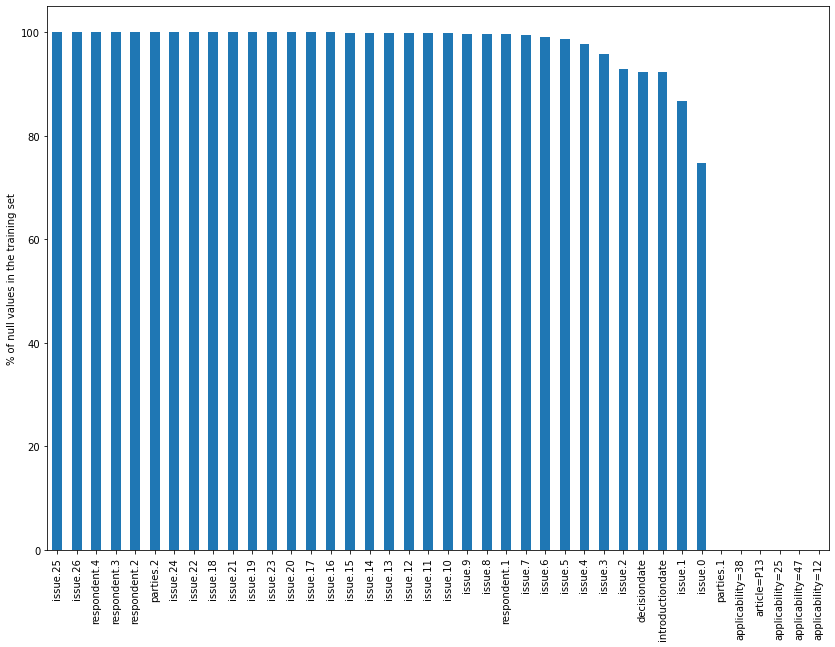

In [7]:
train_null_cols = train_df.isnull().sum().sort_values(ascending=False)/len(train_df)*100
train_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

Text(0, 0.5, '% of null values in the training set')

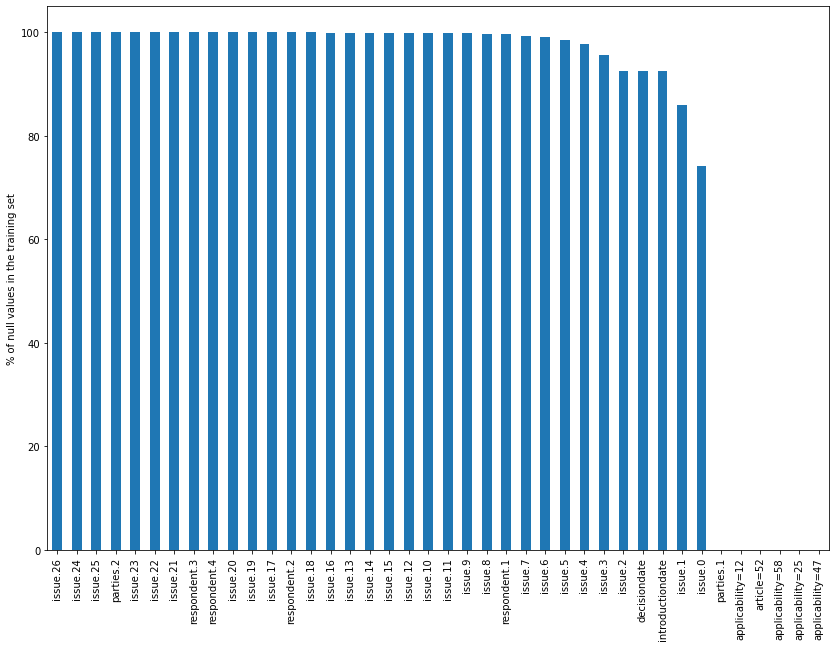

In [8]:
test_null_cols = test_df.isnull().sum().sort_values(ascending=False)/len(test_df)*100
test_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

In [9]:
# store the columns with >60% values as NULL
train_null_arr = np.array(train_null_cols[:34].index)
test_null_arr = np.array(test_null_cols[:34].index)

In [10]:
# check whether these NULL columns are same in number in both the cases
len(train_null_arr), len(test_null_arr)

(34, 34)

In [11]:
# Are these columns same in both the cases. if yes, then we should get back a null set below
set(train_null_arr).difference(test_null_arr)

set()

In [12]:
# drop these columns
train_df.drop(train_null_arr,axis=1,inplace=True)
test_df.drop(test_null_arr,axis=1,inplace=True)

In [13]:
print("The shape of the training dataset after dropping null columns : {}".format(train_df.shape))
print("The shape of the test dataset after dropping null columns : {}".format(test_df.shape))

The shape of the training dataset after dropping null columns : (8878, 294)
The shape of the test dataset after dropping null columns : (4760, 293)


In [14]:
# how many columns have only one unique value?
cols_with_one_val_train = np.array(train_df.nunique()[train_df.nunique()==1].index)
cols_with_one_val_test = np.array(test_df.nunique()[test_df.nunique()==1].index)

In [15]:
len(cols_with_one_val_test), len(cols_with_one_val_train)

(46, 23)

In [16]:
cols_with_one_val_train

array(['application', 'languageisocode', 'originatingbody_type',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=51', 'applicability=7',
       'applicability=28', 'applicability=29', 'applicability=31',
       'applicability=19', 'applicability=40', 'applicability=34',
       'applicability=27', 'applicability=64', 'applicability=4',
       'applicability=77', 'paragraphs=7-2', 'paragraphs=28-3',
       'paragraphs=27-1-b', 'paragraphs=32-2', 'paragraphs=46-4'],
      dtype=object)

In [17]:
cols_with_one_val_test

array(['application', 'languageisocode', 'originatingbody_type',
       'article=33', 'article=52', 'article=P13',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=22', 'applicability=15',
       'applicability=50', 'applicability=6', 'applicability=81',
       'applicability=66', 'applicability=49', 'applicability=63',
       'applicability=68', 'applicability=46', 'applicability=35',
       'applicability=54', 'applicability=16', 'applicability=57',
       'applicability=2', 'applicability=67', 'applicability=71',
       'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2',
       'paragraphs=P1-4', 'paragraphs=56-1', 'paragraphs=P7-1-2',
       'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a',
       'paragraphs=4-3', 'paragraphs=52', 'paragraphs=P13-1',
       'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
       'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17',
       'ccl_articl

In [18]:
# Are these columns common in both the sets?
set(cols_with_one_val_test).intersection(cols_with_one_val_train)

{'application',
 'documentcollectionid=CASELAW',
 'documentcollectionid=ENG',
 'documentcollectionid=JUDGMENTS',
 'languageisocode',
 'originatingbody_type'}

In [19]:
# drop the columns with only one unique values in both the datasets
cols_with_one_val = list(set(cols_with_one_val_test).intersection(cols_with_one_val_train))
train_df.drop(cols_with_one_val, axis=1, inplace=True)
test_df.drop(cols_with_one_val, axis=1, inplace=True)

In [20]:
# columns that have one unique val in training set but not in test set -> needs special attention
one_val_train = ['applicability=51', 'applicability=7','applicability=28', 'applicability=29', 'applicability=31',
                 'applicability=19', 'applicability=40', 'applicability=34','applicability=27', 'applicability=64', 
                 'applicability=4','applicability=77', 'paragraphs=7-2', 'paragraphs=28-3','paragraphs=27-1-b', 
                 'paragraphs=32-2', 'paragraphs=46-4']

for col in one_val_train:
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
---------------------------

In [21]:
# since these columns are constant during training, it is better to remove them from both the datasets. But before
# that let's apply value_counts on these columns in the test set

print("Test set")
for col in one_val_train:
    print("*********************")
    print("col : {}".format(col))
    print(test_df[col].value_counts())
    print("---------------------")

Test set
*********************
col : applicability=51
0    4759
1       1
Name: applicability=51, dtype: int64
---------------------
*********************
col : applicability=7
0    4758
1       2
Name: applicability=7, dtype: int64
---------------------
*********************
col : applicability=28
0    4759
1       1
Name: applicability=28, dtype: int64
---------------------
*********************
col : applicability=29
0    4759
1       1
Name: applicability=29, dtype: int64
---------------------
*********************
col : applicability=31
0    4759
1       1
Name: applicability=31, dtype: int64
---------------------
*********************
col : applicability=19
0    4759
1       1
Name: applicability=19, dtype: int64
---------------------
*********************
col : applicability=40
0    4759
1       1
Name: applicability=40, dtype: int64
---------------------
*********************
col : applicability=34
0    4759
1       1
Name: applicability=34, dtype: int64
---------------------
*

In [22]:
# Therefore, it looks like these columns are constant 99% of the time even in the test set and we can safely 
# remove them.
train_df.drop(one_val_train,axis=1,inplace=True)
test_df.drop(one_val_train,axis=1,inplace=True)

In [23]:
# columns that have one unique val in test set but not in training set -> we can keep these columns
one_val_test = ['article=33', 'article=52', 'article=P13', 'applicability=22', 'applicability=15',
                'applicability=50', 'applicability=6', 'applicability=81', 'applicability=66', 'applicability=49',
                'applicability=63', 'applicability=68', 'applicability=46', 'applicability=35','applicability=54', 
                'applicability=16', 'applicability=57', 'applicability=2', 'applicability=67', 'applicability=71',
                'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2', 'paragraphs=P1-4', 'paragraphs=56-1', 
                'paragraphs=P7-1-2', 'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a', 'paragraphs=4-3',
                'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
                'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17', 'ccl_article=46', 'ccl_article=p12']

for col in one_val_test:
    print("column name : ", col)
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

column name :  article=33
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=52
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=P13
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=22
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=15
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=50
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=6
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=81
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=66
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=49
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability

In [24]:
# column 'ccl_article=17' has two binary values as -1 and 0. Let's investigate it.
train_df['ccl_article=17'].value_counts(normalize=True)

 0    0.999887
-1    0.000113
Name: ccl_article=17, dtype: float64

In [25]:
test_df['ccl_article=17'].value_counts(normalize=True)

0    1.0
Name: ccl_article=17, dtype: float64

In [26]:
# must be a mistake in entering value in the column 'ccl_article=17' in the train set. Let's drop this column as 
# well.
train_df.drop('ccl_article=17',axis=1,inplace=True)
test_df.drop('ccl_article=17',axis=1,inplace=True)

In [27]:
# Now let's look at distribution of categories in these columns in the training set
print("Train set")
one_val_test.remove('ccl_article=17')
for col in one_val_test:
    print("*********************")
    print("col : {}".format(col))
    print(train_df[col].value_counts())
    print("---------------------")

Train set
*********************
col : article=33
0    8877
1       1
Name: article=33, dtype: int64
---------------------
*********************
col : article=52
0    8876
1       2
Name: article=52, dtype: int64
---------------------
*********************
col : article=P13
0    8877
1       1
Name: article=P13, dtype: int64
---------------------
*********************
col : applicability=22
0    8877
1       1
Name: applicability=22, dtype: int64
---------------------
*********************
col : applicability=15
0    8877
1       1
Name: applicability=15, dtype: int64
---------------------
*********************
col : applicability=50
0    8876
1       2
Name: applicability=50, dtype: int64
---------------------
*********************
col : applicability=6
0    8876
1       2
Name: applicability=6, dtype: int64
---------------------
*********************
col : applicability=81
0    8877
1       1
Name: applicability=81, dtype: int64
---------------------
*********************
col : applic

In [28]:
# So, as we can see almost all the columns except 'paragraphs=35-2' has not more than 3 entries associated with 
# category=1. Even the col 'paragraphs=35-2' has a very tiny fraction of category=1. So, we will drop these 
# columns from both the training and test sets as of now. 

train_df.drop(one_val_test,axis=1,inplace=True)
test_df.drop(one_val_test,axis=1,inplace=True)

In [29]:
print("The shape of the training set after dropping columns with constant values : {}".format(train_df.shape))
print("The shape of the test set after dropping columns with constant values : {}".format(test_df.shape))

The shape of the training set after dropping columns with constant values : (8878, 231)
The shape of the test set after dropping columns with constant values : (4760, 230)


In [30]:
# check whether there is any duplicate row in both the datasets
print(train_df.duplicated().value_counts())
print("--------------------------")
print(test_df.duplicated().value_counts())

False    8878
dtype: int64
--------------------------
False    4760
dtype: int64


In [31]:
# let's now look at the cols with 'object' type
obj_cols_train = train_df.select_dtypes(include='object')
obj_cols_test = test_df.select_dtypes(include='object')

In [32]:
# are columns with object type are same in both the datsets
print("Train set")
print(list(obj_cols_train.columns))
print("-------------------------------------------------------------------------------------------------------------")
print("Test set")
print(list(obj_cols_test.columns))

Train set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']
-------------------------------------------------------------------------------------------------------------
Test set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']


In [33]:
# let's check these columns one by one

**Feature 'appno'**

In [34]:
print("col : appno")
print("Total no. of unique values in the training set : {}".format(train_df['appno'].nunique()))
print("Total no. of unique values in the test set : {}".format(test_df['appno'].nunique()))

col : appno
Total no. of unique values in the training set : 8799
Total no. of unique values in the test set : 4760


In [35]:
# this feature is more likely to be same as that of fetaure like id with different value for each instance and is
# not significant to train on. Let's drop it.
train_df.drop('appno',axis=1,inplace=True)
test_df.drop('appno',axis=1,inplace=True)

**Feature 'country.alpha2'**

In [36]:
print("col : country.alpha2")
print("Total no. of unique values in the training set : {}".format(train_df['country.alpha2'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.alpha2'].nunique()))
print("Train set : ",train_df['country.alpha2'].unique(),"\n")
print("Test set : ",test_df['country.alpha2'].unique(),"\n")

col : country.alpha2
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['ru' 'tr' 'si' 'ch' 'gr' 'pl' 'gb' 'hu' 'es' 'ua' 'me' 'cz' 'lt' 'az'
 'md' 'mk' 'ro' 'rs' 'de' 'bg' 'al' 'at' 'hr' 'sk' 'it' 'fi' 'fr' 'se'
 'no' 'is' 'am' 'mt' 'be' 'cy' 'ge' 'pt' 'dk' 'lv' 'ee' 'ba' 'nl' 'ie'
 'li' 'sm' 'lu' 'ad'] 

Test set :  ['mk' 'ua' 'ie' 'ru' 'bg' 'pl' 'gr' 'hu' 'de' 'at' 'hr' 'lt' 'md' 'si'
 'fi' 'tr' 'ro' 'cz' 'dk' 'gb' 'al' 'se' 'nl' 'rs' 'sk' 'is' 'lv' 'cy'
 'ge' 'it' 'ch' 'mt' 'es' 'pt' 'ba' 'ee' 'az' 'am' 'sm' 'no' 'be' 'me'
 'fr' 'lu' 'ad' 'li'] 



In [37]:
# do categories present in both of these files same?
print(set(train_df['country.alpha2'].unique()).difference(test_df['country.alpha2'].unique()))
print(set(test_df['country.alpha2'].unique()).difference(train_df['country.alpha2'].unique()))

set()
set()


In [38]:
# what is the distribution of different categories?
print("Train Set:")
print(train_df['country.alpha2'].value_counts(normalize=True))
print("\n")
print("Test Set:")
print(test_df['country.alpha2'].value_counts(normalize=True))

Train Set:
ru    0.185515
ua    0.105091
tr    0.097770
pl    0.069498
hu    0.041000
ro    0.037734
bg    0.034242
gb    0.033904
hr    0.028723
at    0.026245
sk    0.025569
it    0.025118
md    0.024668
si    0.023541
de    0.022077
fr    0.019374
az    0.015093
lt    0.014643
rs    0.014305
fi    0.013066
mk    0.012390
gr    0.010926
nl    0.010813
am    0.009687
ch    0.008223
mt    0.007885
se    0.007547
lv    0.007434
ge    0.006871
cy    0.006195
cz    0.005745
pt    0.005745
ba    0.005632
be    0.005407
es    0.005294
ee    0.004956
al    0.004731
me    0.004393
no    0.004055
dk    0.002591
ie    0.002365
is    0.001577
sm    0.000788
lu    0.000788
li    0.000676
ad    0.000113
Name: country.alpha2, dtype: float64


Test Set:
ru    0.205462
tr    0.095168
ua    0.090966
pl    0.074370
hu    0.041597
ro    0.039286
gb    0.034034
bg    0.033193
hr    0.028151
md    0.027941
sk    0.025210
at    0.023950
si    0.023109
it    0.020588
de    0.019118
rs    0.017227
lt    0.01

**Feature 'country.name'**

In [39]:
print("col : country.name")
print("Total no. of unique values in the training set : {}".format(train_df['country.name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.name'].nunique()))
print("Train set : ",train_df['country.name'].unique(),"\n")
print("Test set : ",test_df['country.name'].unique(),"\n")

col : country.name
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['Russian Federation' 'Turkey' 'Slovenia' 'Switzerland' 'Greece' 'Poland'
 'United Kingdom' 'Hungary' 'Spain' 'Ukraine' 'Montenegro' 'Czechia'
 'Lithuania' 'Azerbaijan' 'Moldova, Republic of' 'North Macedonia'
 'Romania' 'Serbia' 'Germany' 'Bulgaria' 'Albania' 'Austria' 'Croatia'
 'Slovakia' 'Italy' 'Finland' 'France' 'Sweden' 'Norway' 'Iceland'
 'Armenia' 'Malta' 'Belgium' 'Cyprus' 'Georgia' 'Portugal' 'Denmark'
 'Latvia' 'Estonia' 'Bosnia and Herzegovina' 'Netherlands' 'Ireland'
 'Liechtenstein' 'San Marino' 'Luxembourg' 'Andorra'] 

Test set :  ['North Macedonia' 'Ukraine' 'Ireland' 'Russian Federation' 'Bulgaria'
 'Poland' 'Greece' 'Hungary' 'Germany' 'Austria' 'Croatia' 'Lithuania'
 'Moldova, Republic of' 'Slovenia' 'Finland' 'Turkey' 'Romania' 'Czechia'
 'Denmark' 'United Kingdom' 'Albania' 'Sweden' 'Netherlands' 'Serbia'
 'Slovakia' 'Iceland' 'Lat

In [40]:
# do categories present in both of these files same?
print(set(train_df['country.name'].unique()).difference(test_df['country.name'].unique()))
print(set(test_df['country.name'].unique()).difference(train_df['country.name'].unique()))

set()
set()


In [41]:
# Actually, country.alpha2 and country.name are the same feature. We can drop one of them as of now. Let's drop 
# country.name.
train_df.drop("country.name",axis=1,inplace=True)
test_df.drop("country.name",axis=1,inplace=True)

**Feature 'docname'**

In [42]:
print("col : docname")
print("Total no. of unique values in the training set : {}".format(train_df['docname'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['docname'].nunique()))
print("Train set : ",train_df['docname'].unique(),"\n")
print("Test set : ",test_df['docname'].unique(),"\n")

col : docname
Total no. of unique values in the training set : 8682
Total no. of unique values in the test set : 4727 

Train set :  ['CASE OF KOKOSHKINA v. RUSSIA' 'CASE OF ÖZCAN v. TURKEY'
 'CASE OF DANIJEL PEČNIK v. SLOVENIA' ... 'CASE OF BABUSHKIN v. RUSSIA'
 'CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN' 'CASE OF TUR v. POLAND'] 

Test set :  ['CASE OF CAMINSKI v. "THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"'
 'CASE OF KUSHCH v. UKRAINE' 'CASE OF O. v. IRELAND' ...
 'CASE OF PASCAL v. ROMANIA' 'CASE OF DAOUKOPOULOS v. GREECE'
 'CASE OF VOGLREITER v. AUSTRIA'] 



In [43]:
train_df['docname'].unique()[:5]

array(['CASE OF KOKOSHKINA v. RUSSIA', 'CASE OF ÖZCAN v. TURKEY',
       'CASE OF DANIJEL PEČNIK v. SLOVENIA',
       'CASE OF PALANCI v. SWITZERLAND',
       'CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA'], dtype=object)

In [44]:
train_df[['country.alpha2', 'docname']]

,country.alpha2,docname
0,ru,CASE OF KOKOSHKINA v. RUSSIA
1,tr,CASE OF ÖZCAN v. TURKEY
2,si,CASE OF DANIJEL PEČNIK v. SLOVENIA
3,ch,CASE OF PALANCI v. SWITZERLAND
4,ru,CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA
...,...,...
8873,ua,CASE OF RASHITOV AND OTHERS v. UKRAINE
8874,ru,CASE OF URMANOV v. RUSSIA
8875,ru,CASE OF BABUSHKIN v. RUSSIA
8876,es,CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN


In [45]:
# this feature contains two pieces of information - person name and the country name against which he/she filed a 
# case. The country information is already present in the feature country.alpha2 and name of a person is more similar
# to ids. So, we can drop this feature as well.

train_df.drop('docname', axis=1,inplace=True)
test_df.drop('docname', axis=1,inplace=True)

**Feature 'doctypebranch'**

In [46]:
print("col : doctypebranch")
print("Total no. of unique values in the training set : {}".format(train_df['doctypebranch'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['doctypebranch'].nunique()))
print("Train set : ",train_df['doctypebranch'].unique(),"\n")
print("Test set : ",test_df['doctypebranch'].unique(),"\n")

col : doctypebranch
Total no. of unique values in the training set : 3
Total no. of unique values in the test set : 3 

Train set :  ['CHAMBER' 'COMMITTEE' 'GRANDCHAMBER'] 

Test set :  ['COMMITTEE' 'CHAMBER' 'GRANDCHAMBER'] 



**Feature 'ecli'**

In [47]:
print("col : ecli")
print("Total no. of unique values in the training set : {}".format(train_df['ecli'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['ecli'].nunique()))
print("Train set : ",train_df['ecli'].unique(),"\n")
print("Test set : ",test_df['ecli'].unique(),"\n")

col : ecli
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['ECLI:CE:ECHR:2009:0528JUD000205208' 'ECLI:CE:ECHR:2018:0710JUD000472807'
 'ECLI:CE:ECHR:2012:1018JUD004413506' ...
 'ECLI:CE:ECHR:2007:1018JUD006725301' 'ECLI:CE:ECHR:1997:1219JUD002673795'
 'ECLI:CE:ECHR:2007:1023JUD002169505'] 

Test set :  ['ECLI:CE:ECHR:2011:0224JUD000119404' 'ECLI:CE:ECHR:2015:1203JUD005386511'
 'ECLI:CE:ECHR:2012:0119JUD004383807' ...
 'ECLI:CE:ECHR:2012:0417JUD000080509' 'ECLI:CE:ECHR:2018:0712JUD004471116'
 'ECLI:CE:ECHR:2019:0919JUD002115518'] 



In [48]:
# This feature is basically unique id associated with a case and can be dropped.
train_df.drop('ecli',axis=1,inplace=True)
test_df.drop('ecli',axis=1,inplace=True)

**Feature 'itemid'**

In [49]:
print("col : itemid")
print("Total no. of unique values in the training set : {}".format(train_df['itemid'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['itemid'].nunique()))
print("Train set : ",train_df['itemid'].unique(),"\n")
print("Test set : ",test_df['itemid'].unique(),"\n")

col : itemid
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['001-92699' '001-184490' '001-113810' ... '001-82818' '001-58127'
 '001-82921'] 

Test set :  ['001-103613' '001-158963' '001-108659' ... '001-110382' '001-184485'
 '001-195866'] 



In [50]:
# again a feature similar to ids and hence dropped.
train_df.drop('itemid',axis=1,inplace=True)
test_df.drop('itemid',axis=1,inplace=True)

**Feature 'judgementdate'**

In [51]:
print("col : judgementdate")
print("Total no. of unique values in the training set : {}".format(train_df['judgementdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['judgementdate'].nunique()))
print("Train set : ",train_df['judgementdate'].unique(),"\n")
print("Test set : ",test_df['judgementdate'].unique(),"\n")

col : judgementdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [52]:
# date like feature. We will come back to this later.

**Feature 'kpdate'**

In [53]:
print("col : kpdate")
print("Total no. of unique values in the training set : {}".format(train_df['kpdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['kpdate'].nunique()))
print("Train set : ",train_df['kpdate'].unique(),"\n")
print("Test set : ",test_df['kpdate'].unique(),"\n")

col : kpdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [54]:
# looks like features 'judgementdate' and 'kpdate' represent the same thing.
train_df[['judgementdate','kpdate']].head(10)

,judgementdate,kpdate
0,28/05/2009,28/05/2009
1,10/07/2018,10/07/2018
2,18/10/2012,18/10/2012
3,25/03/2014,25/03/2014
4,01/10/2009,01/10/2009
5,11/04/2002,11/04/2002
6,20/06/2006,20/06/2006
7,27/11/2007,27/11/2007
8,01/03/2001,01/03/2001
9,02/12/2008,02/12/2008


In [55]:
test_df[['judgementdate','kpdate']].head(10)

,judgementdate,kpdate
0,24/02/2011,24/02/2011
1,03/12/2015,03/12/2015
2,19/01/2012,19/01/2012
3,04/07/2013,04/07/2013
4,26/02/2009,26/02/2009
5,12/03/2009,12/03/2009
6,27/11/2014,27/11/2014
7,12/02/2009,12/02/2009
8,23/10/2012,23/10/2012
9,13/01/2011,13/01/2011


In [56]:
# So these two are duplicate features and we drop one of them.
train_df.drop('kpdate',axis=1,inplace=True)
test_df.drop('kpdate',axis=1,inplace=True)

**Feature 'originatingbody_name'**

In [57]:
print("col : originatingbody_name")
print("Total no. of unique values in the training set : {}".format(train_df['originatingbody_name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['originatingbody_name'].nunique()))
print("Train set : ",train_df['originatingbody_name'].unique(),"\n")
print("Test set : ",test_df['originatingbody_name'].unique(),"\n")

col : originatingbody_name
Total no. of unique values in the training set : 13
Total no. of unique values in the test set : 13 

Train set :  ['First Section' 'Second Section Committee' 'Fith Section'
 'Second Section' 'Fourth Section' 'Chamber' 'Fourth Section Committee'
 'Fith Section Committee' 'Third Section Committee' 'Third Section'
 'First Section Committee' 'Grand Chamber' 'Plenary'] 

Test set :  ['Fith Section Committee' 'Fith Section' 'First Section' 'Fourth Section'
 'First Section Committee' 'Fourth Section Committee'
 'Third Section Committee' 'Second Section Committee' 'Third Section'
 'Second Section' 'Grand Chamber' 'Chamber' 'Plenary'] 



In [58]:
# are all categories same in both the datasets?
print(set(train_df['originatingbody_name'].unique()).difference(test_df['originatingbody_name']))
print(set(test_df['originatingbody_name'].unique()).difference(train_df['originatingbody_name']))

set()
set()


In [59]:
print("col : originatingbody_name \n")
print("Train Set")
print(train_df['originatingbody_name'].value_counts(normalize=True))
print("------------------------------------------")
print("Test Set")
print(test_df['originatingbody_name'].value_counts(normalize=True))

col : originatingbody_name 

Train Set
First Section               0.191372
Fourth Section              0.169858
Second Section              0.133363
Fith Section                0.123001
Third Section               0.111512
Third Section Committee     0.064542
Fith Section Committee      0.047984
Fourth Section Committee    0.039649
Chamber                     0.033003
Grand Chamber               0.030187
Second Section Committee    0.028272
First Section Committee     0.020951
Plenary                     0.006308
Name: originatingbody_name, dtype: float64
------------------------------------------
Test Set
First Section               0.192017
Fourth Section              0.177101
Second Section              0.131092
Third Section               0.126681
Fith Section                0.110504
Third Section Committee     0.062395
Fith Section Committee      0.046849
Fourth Section Committee    0.036765
Chamber                     0.029832
Grand Chamber               0.027521
Second Section 

**Feature 'parties.0'**

In [60]:
print("col : parties.0")
print("Total no. of unique values in the training set : {}".format(train_df['parties.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.0'].nunique()))
print("Train set : ",train_df['parties.0'].unique(),"\n")
print("Test set : ",test_df['parties.0'].unique(),"\n")

col : parties.0
Total no. of unique values in the training set : 8361
Total no. of unique values in the test set : 4624 

Train set :  ['KOKOSHKINA' 'ÖZCAN' 'DANIJEL PEČNIK' ... 'BABUSHKIN'
 'BRUALLA GÓMEZ DE LA TORRE' 'TUR'] 

Test set :  ['CAMINSKI' 'KUSHCH' 'O.' ... 'PASCAL' 'DAOUKOPOULOS' 'VOGLREITER'] 



In [61]:
# if we go back to the dropped feature 'docname', we can associate the feature 'parties.0'  most likely to represent the name
# of a person filing the case. Since, we have dropped this info earlier, we will drop it this time also.

train_df.drop('parties.0',axis=1,inplace=True)
test_df.drop('parties.0',axis=1,inplace=True)

**Feature 'parties.1'**

In [62]:
print("col : parties.1")
print("Total no. of unique values in the training set : {}".format(train_df['parties.1'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.1'].nunique()))
print("Train set : ",train_df['parties.1'].unique(),"\n")
print("Test set : ",test_df['parties.1'].unique(),"\n")

col : parties.1
Total no. of unique values in the training set : 93
Total no. of unique values in the test set : 76 

Train set :  ['RUSSIA' 'TURKEY' 'SLOVENIA' 'SWITZERLAND' 'GREECE' 'POLAND'
 'THE UNITED KINGDOM' 'HUNGARY' 'SPAIN' 'UKRAINE' 'MONTENEGRO'
 'THE CZECH REPUBLIC [Extracts]' 'LITHUANIA' 'AZERBAIJAN' 'MOLDOVA'
 '"THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"' 'ROMANIA' 'SERBIA'
 'GERMANY' 'BULGARIA' 'ALBANIA' 'AUSTRIA' 'CROATIA' 'SLOVAKIA' 'ITALY'
 'FINLAND' 'FRANCE [Extracts]' 'SWEDEN' 'NORWAY' 'FRANCE' 'ICELAND'
 'ARMENIA' 'MALTA' 'BELGIUM [Extracts]' 'BELGIUM' 'CYPRUS' 'GEORGIA'
 'THE REPUBLIC OF MOLDOVA' 'PORTUGAL' 'THE CZECH REPUBLIC' 'DENMARK'
 'LATVIA' 'ESTONIA' 'BOSNIA AND HERZEGOVINA' 'THE NETHERLANDS'
 'THE REPUBLIC OF MOLDOVA AND RUSSIA' 'SAN MARINO AND ITALY'
 'ITALY [Extracts]' 'IRELAND' 'ROMANIA [Extracts]' 'NORTH MACEDONIA'
 'BULGARIA [Extracts]' 'LIECHTENSTEIN' 'AZERBAIJAN AND TURKEY'
 'UKRAINE [Extracts]' 'ITALIE' 'MONTENEGRO AND SERBIA'
 'ROMANIA AND BULGARIA

In [63]:
# This feature seems to represent country names and might be duplicate with country.alpha2

train_df[['country.alpha2','parties.1']].head(10)

,country.alpha2,parties.1
0,ru,RUSSIA
1,tr,TURKEY
2,si,SLOVENIA
3,ch,SWITZERLAND
4,ru,RUSSIA
5,gr,GREECE
6,pl,POLAND
7,gb,THE UNITED KINGDOM
8,hu,HUNGARY
9,tr,TURKEY


In [64]:
test_df[['country.alpha2','parties.1']].head()

,country.alpha2,parties.1
0,mk,"""THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"""
1,ua,UKRAINE
2,ie,IRELAND
3,ru,RUSSIA
4,ru,RUSSIA


In [65]:
# our guess is right! We drop this feature.

train_df.drop('parties.1',axis=1,inplace=True)
test_df.drop('parties.1',axis=1,inplace=True)

**Feature 'respondent.0'**

In [66]:
print("col : respondent.0")
print("Total no. of unique values in the training set : {}".format(train_df['respondent.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['respondent.0'].nunique()))
print("Train set : ",train_df['respondent.0'].unique(),"\n")
print("Test set : ",test_df['respondent.0'].unique(),"\n")

col : respondent.0
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['RUS' 'TUR' 'SVN' 'CHE' 'GRC' 'POL' 'GBR' 'HUN' 'ESP' 'UKR' 'MNE' 'CZE'
 'LTU' 'AZE' 'MDA' 'MKD' 'ROU' 'SRB' 'DEU' 'BGR' 'ALB' 'AUT' 'HRV' 'SVK'
 'ITA' 'FIN' 'FRA' 'SWE' 'NOR' 'ISL' 'ARM' 'MLT' 'BEL' 'CYP' 'GEO' 'PRT'
 'DNK' 'LVA' 'EST' 'BIH' 'NLD' 'IRL' 'LIE' 'SMR' 'LUX' 'AND'] 

Test set :  ['MKD' 'UKR' 'IRL' 'RUS' 'BGR' 'POL' 'GRC' 'HUN' 'DEU' 'AUT' 'HRV' 'LTU'
 'MDA' 'SVN' 'FIN' 'TUR' 'ROU' 'CZE' 'DNK' 'GBR' 'ALB' 'SWE' 'NLD' 'SRB'
 'SVK' 'ISL' 'LVA' 'CYP' 'GEO' 'ITA' 'CHE' 'MLT' 'ESP' 'PRT' 'BIH' 'EST'
 'AZE' 'ARM' 'SMR' 'NOR' 'BEL' 'MNE' 'FRA' 'LUX' 'AND' 'LIE'] 



In [67]:
# again this info is likely to be same as the feature 'country.alpha2'
train_df[['country.alpha2','respondent.0']].head(10)

,country.alpha2,respondent.0
0,ru,RUS
1,tr,TUR
2,si,SVN
3,ch,CHE
4,ru,RUS
5,gr,GRC
6,pl,POL
7,gb,GBR
8,hu,HUN
9,tr,TUR


In [68]:
test_df[['country.alpha2','respondent.0']].head(10)

,country.alpha2,respondent.0
0,mk,MKD
1,ua,UKR
2,ie,IRL
3,ru,RUS
4,ru,RUS
5,ru,RUS
6,ua,UKR
7,bg,BGR
8,pl,POL
9,gr,GRC


In [69]:
# hence we drop it.
train_df.drop('respondent.0',axis=1,inplace=True)
test_df.drop('respondent.0',axis=1,inplace=True)

In [70]:
# remaining cols with 'object' type
final_obj_cols = train_df.select_dtypes(include='object').columns
final_obj_cols

Index(['country.alpha2', 'doctypebranch', 'judgementdate',
       'originatingbody_name'],
      dtype='object')

In [71]:
print("The shape of the training set after dropping categorical features : {}".format(train_df.shape))
print("The shape of the test set after dropping categorical features : {}".format(test_df.shape))

The shape of the training set after dropping categorical features : (8878, 222)
The shape of the test set after dropping categorical features : (4760, 221)


In [72]:
# let's look at the mixed data type features now. Since, we have dropped quite a few cols already, let's first 
# check whether these features are still present in the respective datasets.

print([col for col in mixed_cols_train if col in train_df.columns])
print([col for col in mixed_cols_test if col in test_df.columns])

[]
[]


In [73]:
# so, we have already removed these features from our dataset. Let's look at some non-categorical features.
train_df.select_dtypes(include='bool')

,separateopinion
0,False
1,False
2,True
3,True
4,False
...,...
8873,False
8874,False
8875,False
8876,False


In [74]:
test_df.select_dtypes(include='bool')

,separateopinion
0,False
1,False
2,False
3,False
4,False
...,...
4755,False
4756,False
4757,False
4758,False


In [75]:
# let's convert this as follows : True->1, False->0.
train_df['separateopinion'] = train_df['separateopinion'].apply(lambda x:1 if x is True else 0)
test_df['separateopinion'] = test_df['separateopinion'].apply(lambda x:1 if x is True else 0)

In [76]:
train_df['separateopinion'].head()

0    0
1    0
2    1
3    1
4    0
Name: separateopinion, dtype: int64

In [77]:
train_df.select_dtypes(include='float64')

,rank
0,685.417419
1,2641.901855
2,942.213440
3,1121.770142
4,704.821594
...,...
8873,2424.463379
8874,1698.433228
8875,607.506531
8876,362.514832


In [78]:
test_df.select_dtypes(include='float64')

,rank
0,794.766724
1,1448.891235
2,868.238831
3,1024.145508
4,672.862183
...,...
4755,1678.799805
4756,1161.929688
4757,892.368225
4758,2646.512939


In [79]:
print("Fetaure : rank \n")
print("Train Set")
print("Max. Value : {}, Min Value : {}.".format(train_df['rank'].max(), train_df['rank'].min()))
print("----------------------------------")
print("Test Set")
print("Max. Value : {}, Min Value : {}.".format(test_df['rank'].max(), test_df['rank'].min()))

Fetaure : rank 

Train Set
Max. Value : 9968.310546875, Min Value : 171.353942871094.
----------------------------------
Test Set
Max. Value : 9969.296875, Min Value : 153.414932250977.


In [80]:
# Spread is quite huge. Keep in mind, this feature might require scaling in future.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rank', ylabel='Density'>

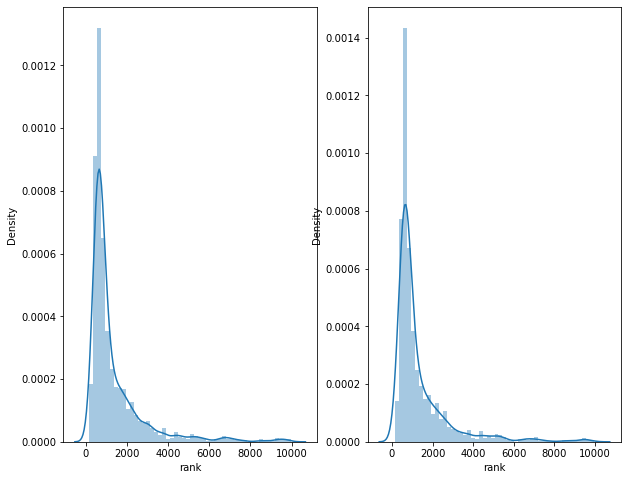

In [81]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
sns.distplot(train_df['rank'],ax=ax[0])
sns.distplot(test_df['rank'], ax=ax[1])

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rank', ylabel='Density'>

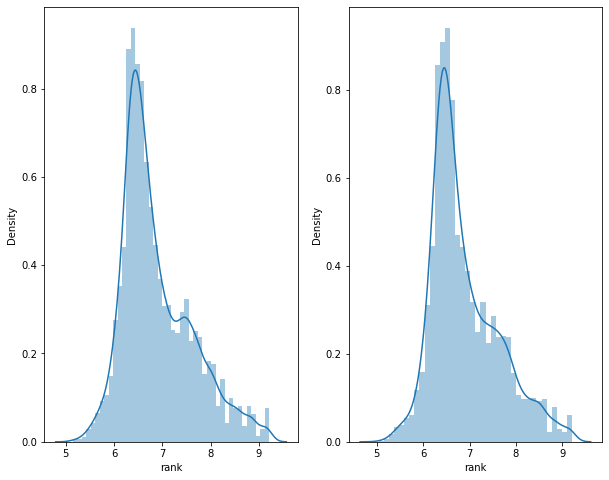

In [82]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
sns.distplot(np.log1p(train_df['rank']),ax=ax[0])
sns.distplot(np.log1p(test_df['rank']), ax=ax[1])

In [83]:
# to enhance model performance, we will log transform the feature "rank". We have also tried applying feature 
# scaling directly on the raw feature.
# we will drop the feature "rank" during training.

In [84]:
train_df["rank_log"] = train_df["rank"].apply(lambda x: np.log1p(x))
test_df["rank_log"] = test_df["rank"].apply(lambda x: np.log1p(x))

In [85]:
print("Fetaure : rank_log \n")
print("Train Set")
print("Max. Value : {}, Min Value : {}.".format(train_df['rank_log'].max(), train_df['rank_log'].min()))
print("----------------------------------")
print("Test Set")
print("Max. Value : {}, Min Value : {}.".format(test_df['rank_log'].max(), test_df['rank_log'].min()))

Fetaure : rank_log 

Train Set
Max. Value : 9.207266707793908, Min Value : 5.149550169818076.
----------------------------------
Test Set
Max. Value : 9.207365639343054, Min Value : 5.039643344384482.


In [86]:
train_df.select_dtypes(include='int64')

,originatingbody,respondentOrderEng,separateopinion,sharepointid,typedescription,article=3,article=6,article=P1,article=5,article=8,...,ccl_article=5,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p4,ccl_article=p6,ccl_article=p7,importance
0,4,38,0,349418,15,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
1,26,47,0,476616,15,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
2,23,43,1,373194,15,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,4
3,5,46,1,392525,15,0,0,0,0,1,...,0,0,0,-1,0,0,0,0,0,4
4,4,38,0,423100,15,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,29,48,0,473530,15,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,4
8874,27,38,0,456937,15,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,4
8875,6,38,0,340823,15,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8876,9,44,0,443927,15,0,1,0,0,0,...,0,-1,0,0,0,0,0,0,0,3


In [87]:
# let's first examine non-binary features

**Feature 'sharepointid'**

In [88]:
print("Total number of unique values in the training set : {}".format(train_df['sharepointid'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['sharepointid'].nunique()))

Total number of unique values in the training set : 8878
Total number of unique values in the test set : 4760


In [89]:
set(train_df['sharepointid']).intersection(test_df['sharepointid'])

set()

In [90]:
# again, this feature is like ids and can be dropped with no harm.
train_df.drop('sharepointid',axis=1,inplace=True)
test_df.drop('sharepointid',axis=1,inplace=True)

**Feature 'originatingbody'**

In [91]:
print("Total number of unique values in the training set : {}".format(train_df['originatingbody'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['originatingbody'].nunique()))

Total number of unique values in the training set : 13
Total number of unique values in the test set : 13


In [92]:
# there was a feature "originatingbody_name". This feature seems to be repetitive with that feature. Let's 
# examine that.

sorted(train_df['originatingbody'].unique())

[4, 5, 6, 7, 8, 9, 15, 23, 25, 26, 27, 28, 29]

In [93]:
print("Train Set")
for feat_val in sorted(train_df['originatingbody'].unique()):
    print(feat_val," : ",train_df.query("originatingbody==@feat_val")['originatingbody_name'].unique()[0])
print("----------------------------------------------")    
print("Test Set")
for feat_val in sorted(test_df['originatingbody'].unique()):
    print(feat_val," : ",test_df.query("originatingbody==@feat_val")['originatingbody_name'].unique()[0])    

Train Set
4  :  First Section
5  :  Second Section
6  :  Third Section
7  :  Fourth Section
8  :  Grand Chamber
9  :  Chamber
15  :  Plenary
23  :  Fith Section
25  :  First Section Committee
26  :  Second Section Committee
27  :  Third Section Committee
28  :  Fourth Section Committee
29  :  Fith Section Committee
----------------------------------------------
Test Set
4  :  First Section
5  :  Second Section
6  :  Third Section
7  :  Fourth Section
8  :  Grand Chamber
9  :  Chamber
15  :  Plenary
23  :  Fith Section
25  :  First Section Committee
26  :  Second Section Committee
27  :  Third Section Committee
28  :  Fourth Section Committee
29  :  Fith Section Committee


In [94]:
# So, we can drop onr of these features. Let's drop 'originatingbody'.
train_df.drop('originatingbody',axis=1,inplace=True)
test_df.drop('originatingbody',axis=1,inplace=True)

**Feature 'respondentOrderEng'**

In [95]:
print("Total number of unique values in the training set : {}".format(train_df['respondentOrderEng'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['respondentOrderEng'].nunique()))

Total number of unique values in the training set : 46
Total number of unique values in the test set : 46


In [96]:
# we encountered another feature 'country.alpha2' before with exactly 46 unique values. Are these two features 
# same?

print("Train Set")
for feat_val in sorted(train_df['respondentOrderEng'].unique()):
    print(feat_val," : ",train_df.query("respondentOrderEng==@feat_val")['country.alpha2'].unique()[0])
print("----------------------------------------------")    
print("Test Set")
for feat_val in sorted(test_df['respondentOrderEng'].unique()):
    print(feat_val," : ",test_df.query("respondentOrderEng==@feat_val")['country.alpha2'].unique()[0])    

Train Set
1  :  al
2  :  ad
3  :  am
4  :  at
5  :  az
6  :  be
7  :  ba
8  :  bg
9  :  hr
10  :  cy
11  :  cz
13  :  dk
14  :  ee
15  :  fi
16  :  fr
17  :  ge
18  :  de
19  :  gr
20  :  hu
21  :  is
22  :  ie
23  :  it
24  :  lv
25  :  li
26  :  lt
27  :  lu
28  :  mt
29  :  md
31  :  me
32  :  nl
33  :  mk
34  :  no
35  :  pl
36  :  pt
37  :  ro
38  :  ru
39  :  sm
40  :  rs
42  :  sk
43  :  si
44  :  es
45  :  se
46  :  ch
47  :  tr
48  :  ua
49  :  gb
----------------------------------------------
Test Set
1  :  al
2  :  ad
3  :  am
4  :  at
5  :  az
6  :  be
7  :  ba
8  :  bg
9  :  hr
10  :  cy
11  :  cz
13  :  dk
14  :  ee
15  :  fi
16  :  fr
17  :  ge
18  :  de
19  :  gr
20  :  hu
21  :  is
22  :  ie
23  :  it
24  :  lv
25  :  li
26  :  lt
27  :  lu
28  :  mt
29  :  md
31  :  me
32  :  nl
33  :  mk
34  :  no
35  :  pl
36  :  pt
37  :  ro
38  :  ru
39  :  sm
40  :  rs
42  :  sk
43  :  si
44  :  es
45  :  se
46  :  ch
47  :  tr
48  :  ua
49  :  gb


In [97]:
# the above analysis shows that 'respondentOrderEng' and 'country.alpha2' are basically duplicate features. Let's
# drop the feature 'respondentOrderEng'.

train_df.drop('respondentOrderEng',axis=1,inplace=True)
test_df.drop('respondentOrderEng',axis=1,inplace=True)

**Feature 'typedescription'**

In [98]:
print("Total number of unique values in the training set : {}".format(train_df['typedescription'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['typedescription'].nunique()))

Total number of unique values in the training set : 5
Total number of unique values in the test set : 3


In [99]:
train_df['typedescription'].unique()

array([15, 14, 18, 12, 19])

In [100]:
test_df['typedescription'].unique()

array([15, 14, 12])

In [101]:
# values 18 and 19 are not present in the test set.

In [102]:
print("Train Set")
print(train_df['typedescription'].value_counts(normalize=True))
print("------------------------")
print("Test Set")
print(test_df['typedescription'].value_counts(normalize=True))

Train Set
15    0.941991
14    0.055193
12    0.001915
18    0.000788
19    0.000113
Name: typedescription, dtype: float64
------------------------
Test Set
15    0.939916
14    0.057983
12    0.002101
Name: typedescription, dtype: float64


In [103]:
# the feature 'typedescription' looks like a categorical feature in disguise. We can use as it is or apply 
# onehotencoding.

# let's now select only the binary features.
binary_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()==2].index)
binary_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()==2].index)

In [104]:
print("Number of binary features in the training set : {}".format(len(binary_feat_train)))
print("Number of binary features in the test set : {}".format(len(binary_feat_test)))

Number of binary features in the training set : 192
Number of binary features in the test set : 194


In [105]:
# there two more binary features in test set compared to the traing set. 
print(len(set(binary_feat_test).intersection(binary_feat_train)))
print(len(set(binary_feat_train).intersection(binary_feat_test)))

192
192


In [106]:
set(binary_feat_test).difference(binary_feat_train)

{'ccl_article=12', 'ccl_article=25'}

In [107]:
test_df['ccl_article=12'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=12, dtype: float64

In [108]:
test_df['ccl_article=25'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=25, dtype: float64

In [109]:
train_df['ccl_article=12'].value_counts(normalize=True)

 0    0.998085
-1    0.001126
 1    0.000788
Name: ccl_article=12, dtype: float64

In [110]:
train_df['ccl_article=25'].value_counts(normalize=True)

 0    0.999099
 1    0.000563
-1    0.000338
Name: ccl_article=25, dtype: float64

In [111]:
# since 99% instances in both these features belong to a single category, we can assume that they are basically
# constant features and should be dropped.
binary_feat_to_drop = list(set(binary_feat_test).difference(binary_feat_train))
train_df.drop(binary_feat_to_drop,axis=1,inplace=True)
test_df.drop(binary_feat_to_drop,axis=1,inplace=True)

In [112]:
binary_feat_test.remove(binary_feat_to_drop[0])
binary_feat_test.remove(binary_feat_to_drop[1])

In [113]:
# check whether any binary feature contains suspicious values, e.g., -1,999 etc.

cols_train = [col for col in binary_feat_train for val in train_df[col].unique() if val!=0 and val!=1]
cols_test = [col for col in binary_feat_test for val in test_df[col].unique() if val!=0 and val!=1]

In [114]:
cols_train

['ccl_article=18']

In [115]:
cols_test

['ccl_article=18']

In [116]:
print("Train set")
print(train_df['ccl_article=18'].value_counts(normalize=True))
print("----------------------------------------")
print("Test set")
print(test_df['ccl_article=18'].value_counts(normalize=True))

Train set
 0    0.998085
-1    0.001915
Name: ccl_article=18, dtype: float64
----------------------------------------
Test set
 0    0.997269
-1    0.002731
Name: ccl_article=18, dtype: float64


In [117]:
# If we consider, -1 to be null value, then replacing it by 0 makes this feature a constant feature and can be 
# dropped. So, like before, we can drop this column. 

#train_df.drop('ccl_article=18',axis=1,inplace=True)
#test_df.drop('ccl_article=18',axis=1,inplace=True)

# alternatively, -1 may be a typo and we can replace it with 1.
train_df['ccl_article=18'] = train_df['ccl_article=18'].apply(lambda x:0 if x==0 else 1)
test_df['ccl_article=18'] = test_df['ccl_article=18'].apply(lambda x:0 if x==0 else 1)

In [118]:
print("Train set")
print(train_df['ccl_article=18'].value_counts(normalize=True))
print("----------------------------------------")
print("Test set")
print(test_df['ccl_article=18'].value_counts(normalize=True))

Train set
0    0.998085
1    0.001915
Name: ccl_article=18, dtype: float64
----------------------------------------
Test set
0    0.997269
1    0.002731
Name: ccl_article=18, dtype: float64


In [119]:
# let's now look at the features which are binary in real but contains some garbage values.

pseudo_bin_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()>2].index)
pseudo_bin_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()>2].index)

In [120]:
set(pseudo_bin_feat_train).difference(pseudo_bin_feat_test)

{'importance'}

In [121]:
# But we have already investigated some of these non-binary features. Let's remove them.
pseudo_bin_feat_train.remove('typedescription')
pseudo_bin_feat_train.remove('importance')
pseudo_bin_feat_test.remove('typedescription')

In [122]:
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts())
    print("Test set \n")
    print(test_df[col].value_counts())
    print("--------------------------------------------------------------")

Train set 

 0    8117
 1     700
-1      61
Name: ccl_article=1, dtype: int64
Test set 

 0    4315
 1     404
-1      41
Name: ccl_article=1, dtype: int64
--------------------------------------------------------------
Train set 

 0    8449
 1     332
-1      97
Name: ccl_article=10, dtype: int64
Test set 

 0    4514
 1     185
-1      61
Name: ccl_article=10, dtype: int64
--------------------------------------------------------------
Train set 

 0    8718
 1     136
-1      24
Name: ccl_article=11, dtype: int64
Test set 

 0    4657
 1      86
-1      17
Name: ccl_article=11, dtype: int64
--------------------------------------------------------------
Train set 

 0    8121
 1     694
-1      63
Name: ccl_article=13, dtype: int64
Test set 

 0    4341
 1     364
-1      55
Name: ccl_article=13, dtype: int64
--------------------------------------------------------------
Train set 

 0    8829
-1      46
 1       3
Name: ccl_article=14, dtype: int64
Test set 

 0    4731
-1      28
 

In [123]:
# the feature 'ccl_article=14' is quite peculliar. It has more entries for category -1 in both train and test sets 
# as compared to category 1. It could be a typo either in favour of -1 or +1. If we assume that 1 is a typo as it is 
# fewer in number, then we can replace 1 by -1 and treat it as null. But then it becomes a constant feature with one
# unique value which is zero and some null entries (when we impute it by 0). In that situation, it is better to 
# drop this feature. Alternatively, if we consider -1 as null value and replace it by 0 ('most_frequent' strategy),
# this feature becomes alsmost a constant fetaure and can be dropped.
# However, if we do reverse, i.e., replace -1 by 1, then it becomes a proper binary feature. Let's first go with the
# first option. If our model performs poorly, we will try to tweak it.

train_df.drop('ccl_article=14',axis=1,inplace=True)
test_df.drop('ccl_article=14',axis=1,inplace=True)

In [124]:
pseudo_bin_feat_train.remove('ccl_article=14')
# for the rest of the features in pseudo_bin_feat_train, we will treat -1 as null entries and impute them later.

In [125]:
# missing value imputation
# but before that, let's check the category distribution in each binary feature with null values
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts(normalize=True))
    print("Test set \n")
    print(test_df[col].value_counts(normalize=True))
    print("--------------------------------------------------------------")

Train set 

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
Test set 

 0    0.906513
 1    0.084874
-1    0.008613
Name: ccl_article=1, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
Test set 

 0    0.948319
 1    0.038866
-1    0.012815
Name: ccl_article=10, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
Test set 

 0    0.978361
 1    0.018067
-1    0.003571
Name: ccl_article=11, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
Test set 

 0    0.911975
 1    0.076471
-1    0.011555
Name: ccl_article=13, dtype: float64
--------------------------------------------------------------
Tr

In [126]:
# stop!! looks like we can drop even more features, e.g. features with 99% dominance by one category.
#cols_to_drop = ['ccl_article=38','ccl_article=4', 'ccl_article=7', 'ccl_article=9','ccl_article=p4','ccl_article=p7']
#train_df.drop(cols_to_drop,axis=1,inplace=True)
#test_df.drop(cols_to_drop,axis=1,inplace=True)

In [127]:
#for col in cols_to_drop:
#    pseudo_bin_feat_train.remove(col)

In [127]:
for col in train_df.columns:
    if 'date' in col:
        print(col)

judgementdate


In [128]:
# let's look at the datetime fetaure 'judgementdate' and break it down into several parts.

train_df['judge_year'] = train_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))
test_df['judge_year'] = test_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))

In [129]:
# how many different judgement years are there?
print("unique values in the col judgementyear in the training set :", sorted(train_df['judge_year'].unique()))
print("\n")
print("unique values in the col judgementyear in the test set :", sorted(test_df['judge_year'].unique()))

unique values in the col judgementyear in the training set : [1968, 1969, 1971, 1974, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


unique values in the col judgementyear in the test set : [1961, 1968, 1970, 1972, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [130]:
# let's club the years in decades and look at the distribution of importance vs judge_year

def year_to_decade(year):
    
    """
    
    """
    
    if year>=1960 and year<=1969:
        return "19_60s"
    elif year>=1970 and year<=1979:
        return "19_70s"
    elif year>=1980 and year<=1989:
        return "19_80s"
    elif year>=1990 and year<=1999:
        return "19_90s"
    elif year>=2000 and year<=2009:
        return "20_10s"
    else:
        return "20_20s"
    
    
train_df['judge_decade'] = train_df['judge_year'].apply(year_to_decade)
test_df['judge_decade'] = test_df['judge_year'].apply(year_to_decade)

In [131]:
train_df[['judge_year','judge_decade']][:10]

,judge_year,judge_decade
0,2009,20_10s
1,2018,20_20s
2,2012,20_20s
3,2014,20_20s
4,2009,20_10s
5,2002,20_10s
6,2006,20_10s
7,2007,20_10s
8,2001,20_10s
9,2008,20_10s


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='judge_decade', ylabel='count'>

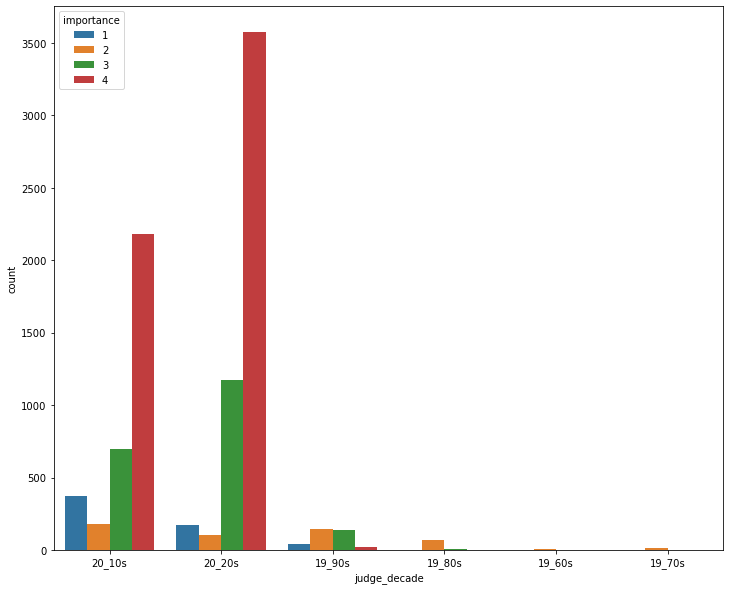

In [132]:
plt.figure(figsize=(12,10))
sns.countplot('judge_decade',hue='importance',data=train_df)

In [133]:
# from the distribution, it is clear that importance of cases filed has increased with decades. We will use it as a
# feature and drop the judge_year column.
train_df.drop('judge_year',axis=1,inplace=True)
test_df.drop('judge_year',axis=1,inplace=True)

# as of now, we will not be engineering the feature judgementdate anymore and won't use it during training. If, in
# future, we need to improve our model by adding some features, we will come back to it.

In [134]:
# Let's now drop cols with high cardinality
print("Training set")
for col in train_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, train_df[col].nunique()))
print("-------------------------------------------------")    
print("Test set")
for col in test_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, test_df[col].nunique()))

Training set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1906
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6
-------------------------------------------------
Test set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1584
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='country.alpha2', ylabel='count'>

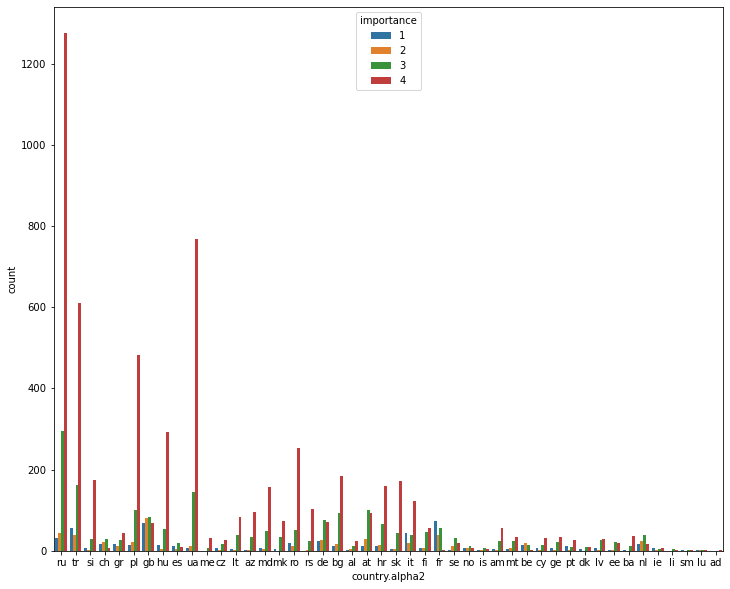

In [135]:
plt.figure(figsize=(12,10))
sns.countplot('country.alpha2',hue='importance',data=train_df)

In [136]:
# some countries have more important cases than others.

In [137]:
#train_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)
#test_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)

train_df.drop('judgementdate',axis=1,inplace=True)
test_df.drop('judgementdate',axis=1,inplace=True)

In [138]:
print("The shape of the training set after feature removal: {}".format(train_df.shape))
print("The shape of the test set after feature removal: {}".format(test_df.shape))

The shape of the training set after feature removal: (8878, 217)
The shape of the test set after feature removal: (4760, 216)


In [139]:
# let's now define our feature matrix and target variable
X = train_df.drop(['importance','rank'],axis=1)
y = train_df[['importance']]

In [140]:
# drop the 'rank' column from the test set
test_df.drop('rank',axis=1,inplace=True)

In [141]:
X.head()

,country.alpha2,doctypebranch,originatingbody_name,separateopinion,typedescription,article=3,article=6,article=P1,article=5,article=8,...,ccl_article=6,ccl_article=7,ccl_article=8,ccl_article=9,ccl_article=p1,ccl_article=p4,ccl_article=p6,ccl_article=p7,rank_log,judge_decade
0,ru,CHAMBER,First Section,0,15,1,0,0,1,0,...,0,0,0,0,0,0,0,0,6.531486,20_10s
1,tr,COMMITTEE,Second Section Committee,0,15,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7.879633,20_20s
2,si,CHAMBER,Fith Section,1,15,0,1,0,0,0,...,1,0,0,0,0,0,0,0,6.849293,20_20s
3,ch,CHAMBER,Second Section,1,15,0,0,0,0,1,...,0,0,-1,0,0,0,0,0,7.023554,20_20s
4,ru,CHAMBER,First Section,0,15,1,0,0,1,0,...,0,0,0,0,0,0,0,0,6.559363,20_10s


In [142]:
#X['typedescription'].replace(to_replace={15:'type_15',14:'type_14',18:"type_18",12:"type_12",19:"type_19"},
#                             inplace=True)
#X['typedescription'].unique()

In [143]:
#test_df['typedescription'].replace(to_replace={15:'type_15',14:'type_14',12:"type_12"}, inplace=True)
#test_df['typedescription'].unique()

In [144]:
y.head()

,importance
0,4
1,4
2,4
3,4
4,4


In [145]:
# let's look at our target variable
y['importance'].value_counts(normalize=True)

4    0.650372
3    0.226515
1    0.065555
2    0.057558
Name: importance, dtype: float64

In [146]:
# Since the cardinality of the target variable is greater than 2, it is a multiclass classification problem. Our 
# target metric is accuracy_score and we will optimize the metric logloss

In [147]:
# missing value imputation
for col in pseudo_bin_feat_train:
    print(train_df[col].value_counts(normalize=True))

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
 0    0.937373
 1    0.053052
-1    0.009574
Name: ccl_article=2, dtype: float64
 0    0.826988
 1    0.140797
-1    0.032214
Name: ccl_article=3, dtype: float64
 0    0.983555
 1    0.008560
-1    0.007885
Name: ccl_article=34, dtype: float64
 0    0.995720
 1    0.003041
-1    0.001239
Name: ccl_article=38, dtype: float64
 0    0.995157
 1    0.002591
-1    0.002253
Name: ccl_article=4, dtype: float64
 0    0.837351
 1    0.138545
-1    0.024105
Name: ccl_article=5, dtype: float64
 0    0.487948
 1    0.451115
-1    0.060937
Name: ccl_article=6, dtype: float64
 0    0.993918
-1    0.003942
 1    0.002140
Name: ccl_article=7, dtype: float64
 0    0.895247
 1    0.

In [148]:
# we assume -1 to represent null values and try to impute it. To impute missing values, we can use the following 
# strategies - 'mean', 'median', 'most_frequent', 'constant'. If a feature is almost entirely dominated by a 
# specific category, it is logical to use 'most_frequent' strategy. 'mean' could be used for a more balanced
# category distribution. 'mean'/median'/'constant' strategy won't work well in this case since we are dealing 
# with binary features.
# However, looking at the above result, one can also think of -1 as a typo since it's percentage is very low.
# Let's first try imputing all -1 using the 'most_frequent' strategy. Later, if needed (to enhance the model's
# performance), we will try replacing all -1 by 1.

In [149]:
# encoding categorical variables
X = pd.get_dummies(X, drop_first=True)
print("The shape of the feature matrix is : {}".format(X.shape))

# test set
test_df = pd.get_dummies(test_df,drop_first=True)
print("The final shape of the test set is : {}".format(test_df.shape))

The shape of the feature matrix is : (8878, 275)
The final shape of the test set is : (4760, 275)


In [150]:
# split the dataset into train and validation subsets with different splitting fractions

#split_frac = 0.2
#split_frac = 0.25
split_frac = 0.18
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=split_frac,random_state=21)

print("The shape of X_train : {}".format(X_train.shape))
print("The shape of X_val : {}".format(X_val.shape))

The shape of X_train : (7279, 275)
The shape of X_val : (1599, 275)


In [152]:
# principal component analysis

In [247]:
# construct an object of PCA class
#pca = PCA(random_state=12)

# fit this pca object on the feature matrix
#pca.fit(X)

In [248]:
# cumulative variance vs n_components plot
#plt.figure(figsize=(16,10))
#x_ax = np.arange(1,X_train.shape[1]+1,1)
#y_ax = np.cumsum(pca.explained_variance_ratio_)

#plt.plot(x_ax,y_ax,linestyle="--")
#plt.ylim(0.0,1.0,1)
#plt.xlabel("number of components")
#plt.ylabel("cumulative variance(%)")

#plt.axhline(y=0.9,color='black',linestyle="-")
#plt.axhline(y=0.95,color='black',linestyle="-")

#plt.axvline(x=50,color='black',linestyle="-")
#plt.axvline(x=75,color='black',linestyle="-")

In [154]:
# let's consider n_components=70 explaining 95% variance of the data.

#pca = PCA(n_components=70,random_state=12)

# n_components=70 did not lead to a good performance. Let's try with n_components=50
#pca = PCA(n_components=50, random_state=12)
#pca.fit(X_train)

In [173]:
#X_train_pca = pca.transform(X_train)
#X_val_pca = pca.transform(X_val)
#test_df_pca = pca.transform(test_df)

In [155]:
#print("The shape of the training set after PCA : {}".format(X_train_pca.shape))
#print("The shape of the validation set after PCA : {}".format(X_val_pca.shape))
#print("The shape of the test set after PCA : {}".format(test_df_pca.shape))

In [185]:
# build the model pipeline

def build_pipeline(model):
    
    pipeline = Pipeline([
                    ('imputer', SimpleImputer(missing_values=-1,strategy='most_frequent')),
                    #('imputer', SimpleImputer(missing_values=-1,strategy='constant',fill_value=1)),
                    ('scaler', StandardScaler()),
                    #('pca', PCA(n_components=70,random_state=12)), 
                    #('pca', PCA(n_components=50,random_state=12)),
                    ('classifier', model)
                   ])
        
    return pipeline    

In [186]:
# grid search 

def grid_search(model,param_dict):
    
    grid_cv = GridSearchCV(model,param_grid=param_dict, scoring='accuracy', verbose=1) #scoring='neg_log_loss'
    return grid_cv

In [160]:
# first we will perform coarse scanning. Then, if needed, finer scanning would be tried.

In [158]:
# distribution of different classes in training and validation sets
print("Train Set")
print(y_train['importance'].value_counts(normalize=True))
print("\n")
print("Validation Set")
print(y_val['importance'].value_counts(normalize=True))

Train Set
4    0.649128
3    0.226679
1    0.066630
2    0.057563
Name: importance, dtype: float64


Validation Set
4    0.656035
3    0.225766
1    0.060663
2    0.057536
Name: importance, dtype: float64


In [187]:
def fit_and_eval_model(model, param_dict,X_train,y_train,X_val,y_val):
    
    model_name = str(model).split("(")[0]
    
    pipeline = build_pipeline(model)
    grid_cv = grid_search(pipeline,param_dict)

    # fit the model to the train set
    grid_cv.fit(X_train,y_train)

    # predict on the train set
    train_pred = grid_cv.predict(X_train)

    # predict on the validation set
    val_pred = grid_cv.predict(X_val)

    # evaluate the model on the train set
    train_score = accuracy_score(y_true=y_train, y_pred=train_pred)

    # evaluate the model on the validation set
    val_score = accuracy_score(y_true=y_val, y_pred=val_pred)


    print("The best parameter for the model {} is {}.\n".format(model_name, grid_cv.best_params_))
    print("The best score obtained for the model {} during grid search is {}.\n".format(model_name,grid_cv.best_score_))
    print("The train score of the model {} is {}.\n".format(model_name,train_score))
    print("The validation score of the model {} is {}.".format(model_name,val_score))    
    
    return grid_cv, train_score, val_score

In [142]:
# save the final dataframes

#joblib.dump(X_train,"X_train.pkl")
#joblib.dump(X_val,"X_val.pkl")
#joblib.dump(y_train,"y_train.pkl")
#joblib.dump(y_val,"y_val.pkl")

In [143]:
# load the save datasets

#X_train = joblib.load("X_train.pkl")
#X_val = joblib.load("X_val.pkl")
#y_train = joblib.load("y_train.pkl")
#y_val = joblib.load("y_val.pkl")

#X_train.shape, X_val.shape

**K nearest neighbors**

In [179]:
model = KNeighborsClassifier()

param_dict = {'classifier__n_neighbors': list(np.arange(5,35,5)),
              'classifier__weights': ['uniform','distance']}

grid_cv_knn, knn_train_score, knn_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   0.8s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   0.8s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   0.8s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   0.8s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   0.8s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   0.8s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   0.8s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   1.0s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   1.0s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   1.2s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   1.1s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   1.2s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   1.0s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   1.0s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   0.9s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   1.0s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   0.9s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   56.3s finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model KNeighborsClassifier is {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}.

The best score obtained for the model KNeighborsClassifier during grid search is 0.7735959744722631.

The train score of the model KNeighborsClassifier is 1.0.

The validation score of the model KNeighborsClassifier is 0.7792370231394622.


**Logistic Regression**

In [189]:
model = LogisticRegression(multi_class='multinomial')

param_dict = {'classifier__C': list(np.arange(3.5,20.5,0.5)),
              'classifier__class_weight': ['None','balanced']}

grid_cv_lr, lr_train_score, lr_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 68 candidates, totalling 340 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (statu

The best parameter for the model LogisticRegression is {'classifier__C': 8.0, 'classifier__class_weight': 'balanced'}.

The best score obtained for the model LogisticRegression during grid search is 0.7959908047279182.

The train score of the model LogisticRegression is 0.8363786234372853.

The validation score of the model LogisticRegression is 0.8005003126954346.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Random Forest Classifier**

In [193]:
model = RandomForestClassifier()
param_dict = {'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__criterion': ['gini','entropy'],
              'classifier__max_features':['sqrt','log2'],
              'classifier__class_weight':['balanced',None]
             }

grid_cv_rf, rf_train_score, rf_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages

The best parameter for the model RandomForestClassifier is {'classifier__class_weight': None, 'classifier__criterion': 'gini', 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 110}.

The best score obtained for the model RandomForestClassifier during grid search is 0.8748461160832296.

The train score of the model RandomForestClassifier is 1.0.

The validation score of the model RandomForestClassifier is 0.8736710444027517.


**XGB classifier**

In [190]:
model = XGBClassifier()
param_dict = {
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__learning_rate': np.arange(0.1,1,0.1)
              #'classifier__booster': ['gbtree','gblinear','dart']
             }

grid_cv_xgb, xgb_train_score, xgb_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:09:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:10:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:11:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:12:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:13:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:14:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:15:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:16:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:17:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:18:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:19:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:20:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:21:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:22:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:23:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:24:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:25:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:26:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:27:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:28:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:29:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:29:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:29:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:29:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 20.2min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The best parameter for the model XGBClassifier is {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 90}.

The best score obtained for the model XGBClassifier during grid search is 0.8833636380801329.

The train score of the model XGBClassifier is 0.9495809863992306.

The validation score of the model XGBClassifier is 0.8749218261413383.


**Extra Tree Classifier**

In [144]:
X_train.shape[0]*0.5, X_train.shape[0]*0.25, X_train.shape[0]*0.6

(3551.0, 1775.5, 4261.2)

In [133]:
model = ExtraTreesClassifier()
param_dict = {
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__criterion': ['gini','entropy'],
              'classifier__max_features': ['sqrt','log2'],
              'classifier__class_weight': [None,'balanced'],
              'classifier__max_samples': [0.25,0.5,0.6]
             }

grid_cv_et, et_train_score, et_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   1.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.1min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model ExtraTreesClassifier is {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_features': 'sqrt', 'classifier__max_samples': 0.5, 'classifier__n_estimators': 50}.

The best score obtained for the model ExtraTreesClassifier during grid search is 0.8532806692370973.

The train score of the model ExtraTreesClassifier is 1.0.

The validation score of the model ExtraTreesClassifier is 0.856418918918919.


**CatBoost classifier**

In [191]:
model = CatBoostClassifier(eval_metric='Accuracy',verbose=500)
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,0.5,0.1)),
            }

grid_cv_cc, cc_train_score, cc_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.8179632	total: 30.1ms	remaining: 30.1s
500:	learn: 0.8722308	total: 3.78s	remaining: 3.77s
999:	learn: 0.8863129	total: 7.45s	remaining: 0us
0:	learn: 0.8126395	total: 23ms	remaining: 23s
500:	learn: 0.8705135	total: 3.8s	remaining: 3.78s
999:	learn: 0.8835652	total: 7.53s	remaining: 0us
0:	learn: 0.8229435	total: 20.5ms	remaining: 20.5s
500:	learn: 0.8751503	total: 4.17s	remaining: 4.15s
999:	learn: 0.8857977	total: 7.81s	remaining: 0us
0:	learn: 0.8013052	total: 19.1ms	remaining: 19.1s
500:	learn: 0.8778980	total: 3.78s	remaining: 3.77s
999:	learn: 0.8894041	total: 7.44s	remaining: 0us
0:	learn: 0.8258929	total: 21.5ms	remaining: 21.5s
500:	learn: 0.8736264	total: 3.77s	remaining: 3.75s
999:	learn: 0.8844437	total: 7.74s	remaining: 0us
0:	learn: 0.8179632	total: 20ms	remaining: 19.9s
500:	learn: 0.9271853	total: 4.07s	remaining: 4.05s
999:	learn: 0.9574103	total: 8.24s	remaining: 0us
0:	learn: 0.8126395	total: 19.6ms	remaining: 19.6s
500:	learn: 0.9268418	total: 4.17s	rem

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.6min finished


0:	learn: 0.8307460	total: 14.7ms	remaining: 14.7s
500:	learn: 0.9247149	total: 5.11s	remaining: 5.09s
999:	learn: 0.9506800	total: 10.3s	remaining: 0us
The best parameter for the model <catboost.core.CatBoostClassifier object at 0x7fca784b3e10> is {'classifier__learning_rate': 0.11}.

The best score obtained for the model <catboost.core.CatBoostClassifier object at 0x7fca784b3e10> during grid search is 0.8817150976171593.

The train score of the model <catboost.core.CatBoostClassifier object at 0x7fca784b3e10> is 0.9506800384668224.

The validation score of the model <catboost.core.CatBoostClassifier object at 0x7fca784b3e10> is 0.8818011257035647.


**Gradient boosting Classifier**

In [182]:
model = GradientBoostingClassifier()
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,0.5,0.1)),
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__max_features': ['sqrt','log2']
             }

grid_cv_gb, gb_train_score, gb_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

The best parameter for the model GradientBoostingClassifier is {'classifier__learning_rate': 0.21000000000000002, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 130}.

The best score obtained for the model GradientBoostingClassifier during grid search is 0.8391262603376006.

The train score of the model GradientBoostingClassifier is 0.9179832394559693.

The validation score of the model GradientBoostingClassifier is 0.8480300187617261.


**AdaBoost Classifier**

In [192]:
model = AdaBoostClassifier()
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,1,0.1)),
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__base_estimator': [DecisionTreeClassifier(),ExtraTreesClassifier()]
             }

grid_cv_adb, adb_train_score, adb_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when 

The best parameter for the model AdaBoostClassifier is {'classifier__base_estimator': ExtraTreesClassifier(), 'classifier__learning_rate': 0.21000000000000002, 'classifier__n_estimators': 50}.

The best score obtained for the model AdaBoostClassifier during grid search is 0.8627572599222084.

The train score of the model AdaBoostClassifier is 1.0.

The validation score of the model AdaBoostClassifier is 0.8630393996247655.


**Stacking Classifiers - the final classifier**

In [249]:
# we stack our best performing classifiers : XGBClassifier, CatBoostClassifier, AdaBoostClassifier and 
# RandomForestClassifier.

In [229]:
def stack_clf():
    
    # the base models
    level0 = []
    level0.append(('xgb',XGBClassifier(learning_rate=0.2,n_estimators=90)))
    level0.append(('catboost',CatBoostClassifier(learning_rate=0.11,verbose=500)))
    level0.append(('adaboost',AdaBoostClassifier(base_estimator=ExtraTreesClassifier(),learning_rate=0.21,n_estimators=50)))
    level0.append(('rf',RandomForestClassifier(n_estimators=110)))
    
    # the final estimator
    level1 = LogisticRegression()
    
    # the stacking ensemble
    stack_models = StackingClassifier(estimators=level0, final_estimator=level1, cv=5,verbose=3)
    return stack_models

In [230]:
def evaluate_model(model,X,y):
    
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=2,random_state=21)
    scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,error_score='raise')
    return scores

In [231]:
# how the estimator performs for the different folds of the data

stack_models = stack_clf()
pipeline_stack = build_pipeline(stack_models)
initial_time = time()
scores = evaluate_model(pipeline_stack,X_train,y_train)
print("Total time taken for cross validation : {}".format(time()-initial_time))

[14:07:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1903832	total: 43.3ms	remaining: 43.3s
500:	learn: 0.2189041	total: 4.84s	remaining: 4.82s
999:	learn: 0.1601000	total: 9.74s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:07:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[14:07:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


[14:07:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1844671	total: 20.9ms	remaining: 20.8s
500:	learn: 0.2117862	total: 4.39s	remaining: 4.37s
999:	learn: 0.1475289	total: 8.73s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


0:	learn: 1.1835647	total: 13.2ms	remaining: 13.2s
500:	learn: 0.2085852	total: 4.92s	remaining: 4.91s
999:	learn: 0.1454478	total: 9.92s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.1s remaining:    0.0s


0:	learn: 1.1924945	total: 13.1ms	remaining: 13.1s
500:	learn: 0.2091214	total: 4.23s	remaining: 4.21s
999:	learn: 0.1451429	total: 8.51s	remaining: 0us
0:	learn: 1.1877273	total: 13.1ms	remaining: 13.1s
500:	learn: 0.2055440	total: 4.23s	remaining: 4.21s
999:	learn: 0.1437924	total: 8.38s	remaining: 0us
0:	learn: 1.1934998	total: 8.76ms	remaining: 8.75s
500:	learn: 0.2210430	total: 4.38s	remaining: 4.37s
999:	learn: 0.1555697	total: 8.95s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


[14:08:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1927797	total: 11.3ms	remaining: 11.3s
500:	learn: 0.2237302	total: 5.2s	remaining: 5.17s
999:	learn: 0.1625625	total: 10.3s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:09:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:09:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[14:09:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:09:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.2047303	total: 15.4ms	remaining: 15.4s
500:	learn: 0.2119148	total: 4.77s	remaining: 4.75s
999:	learn: 0.1458131	total: 9.14s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.7s remaining:    0.0s


0:	learn: 1.1908941	total: 11.3ms	remaining: 11.3s
500:	learn: 0.2141363	total: 4.51s	remaining: 4.49s
999:	learn: 0.1474479	total: 8.94s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.3s remaining:    0.0s


0:	learn: 1.1848820	total: 13.8ms	remaining: 13.8s
500:	learn: 0.2140622	total: 7.05s	remaining: 7.02s
999:	learn: 0.1496195	total: 13.1s	remaining: 0us
0:	learn: 1.1885204	total: 15.2ms	remaining: 15.2s
500:	learn: 0.2114838	total: 4.22s	remaining: 4.2s
999:	learn: 0.1468358	total: 8.39s	remaining: 0us
0:	learn: 1.1882625	total: 9.37ms	remaining: 9.36s
500:	learn: 0.2191682	total: 5.38s	remaining: 5.36s
999:	learn: 0.1536512	total: 10.6s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished


[14:10:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1885104	total: 59.5ms	remaining: 59.4s
500:	learn: 0.2239937	total: 5.89s	remaining: 5.87s
999:	learn: 0.1646790	total: 11.9s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:11:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[14:11:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s


[14:11:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1896685	total: 36.4ms	remaining: 36.3s
500:	learn: 0.2164946	total: 6.34s	remaining: 6.31s
999:	learn: 0.1525398	total: 12.3s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


0:	learn: 1.1965437	total: 15.4ms	remaining: 15.4s
500:	learn: 0.2222989	total: 5.15s	remaining: 5.13s
999:	learn: 0.1569395	total: 10.3s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.1s remaining:    0.0s


0:	learn: 1.1960842	total: 24.6ms	remaining: 24.6s
500:	learn: 0.2155058	total: 5.15s	remaining: 5.13s
999:	learn: 0.1513168	total: 10.4s	remaining: 0us
0:	learn: 1.1954585	total: 19.1ms	remaining: 19.1s
500:	learn: 0.2080345	total: 5.39s	remaining: 5.37s
999:	learn: 0.1445289	total: 12.8s	remaining: 0us
0:	learn: 1.1818411	total: 30.5ms	remaining: 30.5s
500:	learn: 0.2235042	total: 7.43s	remaining: 7.41s
999:	learn: 0.1592107	total: 14.4s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.0s finished


[14:13:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1835143	total: 14.4ms	remaining: 14.4s
500:	learn: 0.2266955	total: 6.93s	remaining: 6.9s
999:	learn: 0.1639428	total: 12.6s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:13:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[14:13:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.4s remaining:    0.0s


[14:13:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:13:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   31.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1907633	total: 32.9ms	remaining: 32.8s
500:	learn: 0.2163330	total: 5.76s	remaining: 5.74s
999:	learn: 0.1519704	total: 11.2s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s


0:	learn: 1.1841784	total: 14.2ms	remaining: 14.1s
500:	learn: 0.2185010	total: 5.67s	remaining: 5.65s
999:	learn: 0.1522890	total: 11.7s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.2s remaining:    0.0s


0:	learn: 1.2064117	total: 7.49ms	remaining: 7.48s
500:	learn: 0.2147254	total: 5.66s	remaining: 5.64s
999:	learn: 0.1506939	total: 11.1s	remaining: 0us
0:	learn: 1.1811048	total: 25.4ms	remaining: 25.4s
500:	learn: 0.2097329	total: 5.24s	remaining: 5.21s
999:	learn: 0.1450812	total: 10.7s	remaining: 0us
0:	learn: 1.1904576	total: 25.3ms	remaining: 25.3s
500:	learn: 0.2237842	total: 5.41s	remaining: 5.38s
999:	learn: 0.1575271	total: 11s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.1s finished


[14:15:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1978633	total: 13.6ms	remaining: 13.6s
500:	learn: 0.2211358	total: 4.39s	remaining: 4.37s
999:	learn: 0.1615124	total: 8.75s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:15:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[14:15:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[14:15:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:15:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1785787	total: 10.8ms	remaining: 10.8s
500:	learn: 0.2126913	total: 4.9s	remaining: 4.88s
999:	learn: 0.1460717	total: 9.73s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


0:	learn: 1.1975070	total: 12.3ms	remaining: 12.3s
500:	learn: 0.2095106	total: 4.73s	remaining: 4.71s
999:	learn: 0.1473867	total: 9.53s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.5s remaining:    0.0s


0:	learn: 1.1967648	total: 18.3ms	remaining: 18.3s
500:	learn: 0.2107321	total: 4.08s	remaining: 4.06s
999:	learn: 0.1473849	total: 8.2s	remaining: 0us
0:	learn: 1.1892259	total: 23.7ms	remaining: 23.6s
500:	learn: 0.2100970	total: 4.69s	remaining: 4.67s
999:	learn: 0.1469216	total: 9.45s	remaining: 0us
0:	learn: 1.1935357	total: 18.6ms	remaining: 18.6s
500:	learn: 0.2200548	total: 4.06s	remaining: 4.04s
999:	learn: 0.1538030	total: 8.19s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   48.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:16:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1867529	total: 9.18ms	remaining: 9.18s
500:	learn: 0.2186531	total: 4.45s	remaining: 4.43s
999:	learn: 0.1596195	total: 8.84s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:17:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[14:17:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s


[14:17:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1866941	total: 19.6ms	remaining: 19.6s
500:	learn: 0.2119518	total: 4.14s	remaining: 4.12s
999:	learn: 0.1489243	total: 8.84s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


0:	learn: 1.1914173	total: 19.4ms	remaining: 19.4s
500:	learn: 0.2110367	total: 4.15s	remaining: 4.13s
999:	learn: 0.1458799	total: 8.26s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.3s remaining:    0.0s


0:	learn: 1.1884975	total: 16ms	remaining: 16s
500:	learn: 0.2090113	total: 4.05s	remaining: 4.04s
999:	learn: 0.1465529	total: 8.14s	remaining: 0us
0:	learn: 1.1835558	total: 19.5ms	remaining: 19.4s
500:	learn: 0.2078725	total: 4.07s	remaining: 4.05s
999:	learn: 0.1433796	total: 8.18s	remaining: 0us
0:	learn: 1.1825178	total: 13.7ms	remaining: 13.7s
500:	learn: 0.2154686	total: 4.08s	remaining: 4.06s
999:	learn: 0.1514304	total: 8.17s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:18:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1915434	total: 8.57ms	remaining: 8.56s
500:	learn: 0.2229496	total: 4.25s	remaining: 4.23s
999:	learn: 0.1602334	total: 8.47s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:18:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[14:18:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:18:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:18:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1821162	total: 9.43ms	remaining: 9.43s
500:	learn: 0.2143362	total: 3.95s	remaining: 3.93s
999:	learn: 0.1498932	total: 8.08s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


0:	learn: 1.1848191	total: 8.07ms	remaining: 8.06s
500:	learn: 0.2131358	total: 3.86s	remaining: 3.84s
999:	learn: 0.1488560	total: 7.8s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.2s remaining:    0.0s


0:	learn: 1.1892948	total: 25.4ms	remaining: 25.4s
500:	learn: 0.2101435	total: 3.92s	remaining: 3.91s
999:	learn: 0.1486243	total: 7.89s	remaining: 0us
0:	learn: 1.1876730	total: 19.4ms	remaining: 19.4s
500:	learn: 0.2080241	total: 4.1s	remaining: 4.09s
999:	learn: 0.1443772	total: 8.32s	remaining: 0us
0:	learn: 1.1894217	total: 10.3ms	remaining: 10.2s
500:	learn: 0.2186522	total: 4.7s	remaining: 4.68s
999:	learn: 0.1545424	total: 9.02s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:19:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1957256	total: 9.09ms	remaining: 9.08s
500:	learn: 0.2201603	total: 4.35s	remaining: 4.34s
999:	learn: 0.1610631	total: 8.69s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:20:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[14:20:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s


[14:20:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:20:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1825870	total: 8.18ms	remaining: 8.17s
500:	learn: 0.2141210	total: 4.28s	remaining: 4.26s
999:	learn: 0.1487066	total: 8.57s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


0:	learn: 1.1873659	total: 17ms	remaining: 17s
500:	learn: 0.2131935	total: 3.9s	remaining: 3.88s
999:	learn: 0.1500780	total: 8.02s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.8s remaining:    0.0s


0:	learn: 1.1942191	total: 11.6ms	remaining: 11.6s
500:	learn: 0.2116931	total: 3.98s	remaining: 3.97s
999:	learn: 0.1483105	total: 7.97s	remaining: 0us
0:	learn: 1.1835422	total: 11.2ms	remaining: 11.2s
500:	learn: 0.2051963	total: 4.7s	remaining: 4.68s
999:	learn: 0.1446497	total: 9.47s	remaining: 0us
0:	learn: 1.1914686	total: 15.4ms	remaining: 15.4s
500:	learn: 0.2207398	total: 3.88s	remaining: 3.86s
999:	learn: 0.1542424	total: 7.86s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:21:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1772421	total: 8.93ms	remaining: 8.92s
500:	learn: 0.2183214	total: 4.9s	remaining: 4.88s
999:	learn: 0.1587080	total: 9.18s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:21:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:21:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:21:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:22:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1845303	total: 19ms	remaining: 19s
500:	learn: 0.2136245	total: 4.15s	remaining: 4.13s
999:	learn: 0.1488458	total: 8.27s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


0:	learn: 1.1987398	total: 19.6ms	remaining: 19.6s
500:	learn: 0.2113012	total: 4.11s	remaining: 4.09s
999:	learn: 0.1459371	total: 8.45s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.0s remaining:    0.0s


0:	learn: 1.1875120	total: 13.8ms	remaining: 13.8s
500:	learn: 0.2097152	total: 3.92s	remaining: 3.9s
999:	learn: 0.1469186	total: 7.86s	remaining: 0us
0:	learn: 1.1882537	total: 20.7ms	remaining: 20.7s
500:	learn: 0.2057197	total: 3.73s	remaining: 3.72s
999:	learn: 0.1418514	total: 7.52s	remaining: 0us
0:	learn: 1.1940335	total: 21.7ms	remaining: 21.6s
500:	learn: 0.2205069	total: 4.77s	remaining: 4.75s
999:	learn: 0.1539388	total: 9.58s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:23:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1914659	total: 11.1ms	remaining: 11s
500:	learn: 0.2240530	total: 5.19s	remaining: 5.17s
999:	learn: 0.1635869	total: 10.2s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:23:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:23:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:23:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1933043	total: 19ms	remaining: 19s
500:	learn: 0.2169325	total: 4.15s	remaining: 4.13s
999:	learn: 0.1525082	total: 8.27s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


0:	learn: 1.1927847	total: 23.5ms	remaining: 23.5s
500:	learn: 0.2134407	total: 4.79s	remaining: 4.77s
999:	learn: 0.1491614	total: 9.63s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.1s remaining:    0.0s


0:	learn: 1.1857831	total: 16ms	remaining: 16s
500:	learn: 0.2133268	total: 3.96s	remaining: 3.94s
999:	learn: 0.1494488	total: 7.96s	remaining: 0us
0:	learn: 1.1935001	total: 16.8ms	remaining: 16.8s
500:	learn: 0.2117550	total: 3.93s	remaining: 3.92s
999:	learn: 0.1490328	total: 7.92s	remaining: 0us
0:	learn: 1.1957582	total: 21.4ms	remaining: 21.4s
500:	learn: 0.2209114	total: 4.72s	remaining: 4.7s
999:	learn: 0.1581335	total: 9.49s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:24:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1918630	total: 8.79ms	remaining: 8.78s
500:	learn: 0.2212255	total: 4.42s	remaining: 4.4s
999:	learn: 0.1620915	total: 8.76s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:24:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:25:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:25:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1952967	total: 10.7ms	remaining: 10.7s
500:	learn: 0.2155639	total: 3.93s	remaining: 3.92s
999:	learn: 0.1514273	total: 7.91s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


0:	learn: 1.1894134	total: 18.6ms	remaining: 18.6s
500:	learn: 0.2156145	total: 4.04s	remaining: 4.03s
999:	learn: 0.1489919	total: 8.86s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.0s remaining:    0.0s


0:	learn: 1.1852691	total: 15.8ms	remaining: 15.8s
500:	learn: 0.2162198	total: 4.13s	remaining: 4.12s
999:	learn: 0.1532895	total: 8.25s	remaining: 0us
0:	learn: 1.1850147	total: 22.8ms	remaining: 22.8s
500:	learn: 0.2050509	total: 4.8s	remaining: 4.78s
999:	learn: 0.1428202	total: 9.61s	remaining: 0us
0:	learn: 1.1861803	total: 21ms	remaining: 20.9s
500:	learn: 0.2241317	total: 4.12s	remaining: 4.1s
999:	learn: 0.1578117	total: 8.24s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:26:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1862979	total: 9.03ms	remaining: 9.02s
500:	learn: 0.2222192	total: 4.37s	remaining: 4.36s
999:	learn: 0.1605314	total: 8.75s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:26:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[14:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:26:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:26:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1850513	total: 9.96ms	remaining: 9.95s
500:	learn: 0.2097454	total: 4.29s	remaining: 4.28s
999:	learn: 0.1469881	total: 8.6s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


0:	learn: 1.1909719	total: 26.5ms	remaining: 26.4s
500:	learn: 0.2119686	total: 4.73s	remaining: 4.71s
999:	learn: 0.1476424	total: 9.48s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s


0:	learn: 1.1884006	total: 22.6ms	remaining: 22.6s
500:	learn: 0.2117037	total: 4.04s	remaining: 4.03s
999:	learn: 0.1457615	total: 8.13s	remaining: 0us
0:	learn: 1.1814927	total: 18.3ms	remaining: 18.3s
500:	learn: 0.2103792	total: 3.91s	remaining: 3.9s
999:	learn: 0.1445984	total: 7.86s	remaining: 0us
0:	learn: 1.1888020	total: 17.4ms	remaining: 17.4s
500:	learn: 0.2220548	total: 4.42s	remaining: 4.41s
999:	learn: 0.1554624	total: 8.91s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


[14:27:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1811857	total: 14ms	remaining: 14s
500:	learn: 0.2221591	total: 4.57s	remaining: 4.55s
999:	learn: 0.1630566	total: 9.11s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:28:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:28:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.3s remaining:    0.0s


[14:28:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:28:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1897986	total: 21.3ms	remaining: 21.2s
500:	learn: 0.2158622	total: 4.27s	remaining: 4.26s
999:	learn: 0.1507554	total: 8.54s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.3s remaining:    0.0s


0:	learn: 1.1950079	total: 21.6ms	remaining: 21.6s
500:	learn: 0.2183898	total: 4.42s	remaining: 4.41s
999:	learn: 0.1520224	total: 8.88s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.7s remaining:    0.0s


0:	learn: 1.1919691	total: 16.8ms	remaining: 16.8s
500:	learn: 0.2127605	total: 4.04s	remaining: 4.03s
999:	learn: 0.1477465	total: 8.18s	remaining: 0us
0:	learn: 1.1833761	total: 23.9ms	remaining: 23.8s
500:	learn: 0.2066365	total: 4.92s	remaining: 4.9s
999:	learn: 0.1451202	total: 9.87s	remaining: 0us
0:	learn: 1.1871789	total: 23.7ms	remaining: 23.6s
500:	learn: 0.2220749	total: 4.91s	remaining: 4.89s
999:	learn: 0.1574154	total: 9.93s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   48.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


[14:29:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1951108	total: 11.9ms	remaining: 11.9s
500:	learn: 0.2202849	total: 5.64s	remaining: 5.62s
999:	learn: 0.1594222	total: 10.9s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:29:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[14:29:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[14:30:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1975846	total: 20.3ms	remaining: 20.3s
500:	learn: 0.2107985	total: 4.18s	remaining: 4.17s
999:	learn: 0.1449335	total: 8.32s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


0:	learn: 1.1978026	total: 23.1ms	remaining: 23.1s
500:	learn: 0.2159698	total: 4.94s	remaining: 4.92s
999:	learn: 0.1515199	total: 9.92s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.5s remaining:    0.0s


0:	learn: 1.2069033	total: 19.5ms	remaining: 19.4s
500:	learn: 0.2112819	total: 4.08s	remaining: 4.07s
999:	learn: 0.1488350	total: 8.17s	remaining: 0us
0:	learn: 1.1913071	total: 9.2ms	remaining: 9.19s
500:	learn: 0.2089097	total: 4.33s	remaining: 4.31s
999:	learn: 0.1443595	total: 8.99s	remaining: 0us
0:	learn: 1.1875927	total: 15.8ms	remaining: 15.8s
500:	learn: 0.2209946	total: 4.5s	remaining: 4.48s
999:	learn: 0.1545225	total: 9.01s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished


[14:31:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1866318	total: 8.92ms	remaining: 8.91s
500:	learn: 0.2240157	total: 4.78s	remaining: 4.76s
999:	learn: 0.1624460	total: 9.54s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:31:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[14:31:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.6s remaining:    0.0s


[14:31:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1869643	total: 20.9ms	remaining: 20.9s
500:	learn: 0.2155036	total: 5.45s	remaining: 5.43s
999:	learn: 0.1507395	total: 10.5s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


0:	learn: 1.1934722	total: 18ms	remaining: 18s
500:	learn: 0.2169175	total: 4.63s	remaining: 4.61s
999:	learn: 0.1518541	total: 9.24s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.1s remaining:    0.0s


0:	learn: 1.1927251	total: 19.8ms	remaining: 19.8s
500:	learn: 0.2161562	total: 4.42s	remaining: 4.4s
999:	learn: 0.1489740	total: 9.1s	remaining: 0us
0:	learn: 1.1808140	total: 21.7ms	remaining: 21.7s
500:	learn: 0.2068238	total: 4.34s	remaining: 4.32s
999:	learn: 0.1447544	total: 8.9s	remaining: 0us
0:	learn: 1.1928865	total: 20.5ms	remaining: 20.5s
500:	learn: 0.2228604	total: 4.14s	remaining: 4.13s
999:	learn: 0.1549154	total: 8.35s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


[14:32:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1916477	total: 19.8ms	remaining: 19.8s
500:	learn: 0.2225466	total: 4.82s	remaining: 4.8s
999:	learn: 0.1611909	total: 10s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:33:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:33:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:33:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1921666	total: 6.7ms	remaining: 6.7s
500:	learn: 0.2136001	total: 4.81s	remaining: 4.79s
999:	learn: 0.1491215	total: 9.61s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


0:	learn: 1.1838024	total: 16.5ms	remaining: 16.5s
500:	learn: 0.2125152	total: 4.07s	remaining: 4.05s
999:	learn: 0.1498379	total: 8.2s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.0s remaining:    0.0s


0:	learn: 1.1959812	total: 20.1ms	remaining: 20.1s
500:	learn: 0.2111403	total: 3.97s	remaining: 3.95s
999:	learn: 0.1475291	total: 7.95s	remaining: 0us
0:	learn: 1.1886801	total: 18.8ms	remaining: 18.7s
500:	learn: 0.2068938	total: 4.08s	remaining: 4.07s
999:	learn: 0.1440779	total: 8.22s	remaining: 0us
0:	learn: 1.1929926	total: 19.4ms	remaining: 19.4s
500:	learn: 0.2216998	total: 4.06s	remaining: 4.05s
999:	learn: 0.1570212	total: 8.19s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:34:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1920287	total: 10.2ms	remaining: 10.2s
500:	learn: 0.2236274	total: 5.06s	remaining: 5.04s
999:	learn: 0.1622773	total: 10.1s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:34:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:34:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:35:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:35:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1927644	total: 10.6ms	remaining: 10.6s
500:	learn: 0.2171963	total: 4.78s	remaining: 4.76s
999:	learn: 0.1507480	total: 9.6s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


0:	learn: 1.1807621	total: 18.2ms	remaining: 18.2s
500:	learn: 0.2127531	total: 4.04s	remaining: 4.03s
999:	learn: 0.1481332	total: 8.17s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.1s remaining:    0.0s


0:	learn: 1.2037465	total: 9.13ms	remaining: 9.12s
500:	learn: 0.2148517	total: 4.87s	remaining: 4.85s
999:	learn: 0.1518557	total: 9.04s	remaining: 0us
0:	learn: 1.1853675	total: 18.6ms	remaining: 18.6s
500:	learn: 0.2112739	total: 4.05s	remaining: 4.04s
999:	learn: 0.1476614	total: 8.27s	remaining: 0us
0:	learn: 1.1846142	total: 17ms	remaining: 17s
500:	learn: 0.2230547	total: 3.95s	remaining: 3.93s
999:	learn: 0.1556232	total: 7.93s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


[14:36:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1884556	total: 8.73ms	remaining: 8.73s
500:	learn: 0.2224027	total: 4.22s	remaining: 4.2s
999:	learn: 0.1628363	total: 8.43s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:36:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:36:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


[14:36:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:36:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1821650	total: 24.5ms	remaining: 24.5s
500:	learn: 0.2165530	total: 4.14s	remaining: 4.13s
999:	learn: 0.1500416	total: 8.3s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


0:	learn: 1.1833738	total: 19.2ms	remaining: 19.2s
500:	learn: 0.2127022	total: 4.05s	remaining: 4.04s
999:	learn: 0.1489213	total: 8.19s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s


0:	learn: 1.1853307	total: 13.2ms	remaining: 13.2s
500:	learn: 0.2151742	total: 4.09s	remaining: 4.07s
999:	learn: 0.1516035	total: 8.21s	remaining: 0us
0:	learn: 1.1951125	total: 13.2ms	remaining: 13.2s
500:	learn: 0.2104482	total: 4.07s	remaining: 4.05s
999:	learn: 0.1457050	total: 8.2s	remaining: 0us
0:	learn: 1.1903368	total: 10.6ms	remaining: 10.6s
500:	learn: 0.2227811	total: 4.1s	remaining: 4.08s
999:	learn: 0.1558653	total: 8.29s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:37:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1869758	total: 19.7ms	remaining: 19.7s
500:	learn: 0.2203756	total: 4.24s	remaining: 4.22s
999:	learn: 0.1611230	total: 8.48s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:38:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[14:38:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.1s remaining:    0.0s


[14:38:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:38:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1894307	total: 23.3ms	remaining: 23.3s
500:	learn: 0.2140814	total: 4.82s	remaining: 4.8s
999:	learn: 0.1486846	total: 9.58s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


0:	learn: 1.1880205	total: 9.76ms	remaining: 9.75s
500:	learn: 0.2128142	total: 4.03s	remaining: 4.01s
999:	learn: 0.1496383	total: 8.11s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.9s remaining:    0.0s


0:	learn: 1.1910984	total: 19.3ms	remaining: 19.3s
500:	learn: 0.2111913	total: 3.92s	remaining: 3.9s
999:	learn: 0.1480202	total: 7.87s	remaining: 0us
0:	learn: 1.1821837	total: 15.2ms	remaining: 15.2s
500:	learn: 0.2068756	total: 3.79s	remaining: 3.77s
999:	learn: 0.1429285	total: 7.63s	remaining: 0us
0:	learn: 1.1906423	total: 19.1ms	remaining: 19s
500:	learn: 0.2179232	total: 4.04s	remaining: 4.03s
999:	learn: 0.1533070	total: 8.22s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   44.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s finished


[14:39:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1902109	total: 11.1ms	remaining: 11.1s
500:	learn: 0.2193705	total: 5.08s	remaining: 5.06s
999:	learn: 0.1583669	total: 10.1s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[14:39:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[14:39:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


[14:39:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:39:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1951673	total: 19.6ms	remaining: 19.6s
500:	learn: 0.2113722	total: 3.96s	remaining: 3.95s
999:	learn: 0.1455660	total: 7.9s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.6s remaining:    0.0s


0:	learn: 1.1861202	total: 12.2ms	remaining: 12.1s
500:	learn: 0.2070664	total: 3.85s	remaining: 3.83s
999:	learn: 0.1452017	total: 7.73s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.9s remaining:    0.0s


0:	learn: 1.1806816	total: 20.7ms	remaining: 20.7s
500:	learn: 0.2092340	total: 4.23s	remaining: 4.22s
999:	learn: 0.1448034	total: 8.54s	remaining: 0us
0:	learn: 1.1857900	total: 24.5ms	remaining: 24.4s
500:	learn: 0.2064511	total: 4.83s	remaining: 4.82s
999:	learn: 0.1447370	total: 9.59s	remaining: 0us
0:	learn: 1.1891866	total: 19.9ms	remaining: 19.9s
500:	learn: 0.2138116	total: 4.01s	remaining: 4s
999:	learn: 0.1473619	total: 8.16s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


Total time taken for cross validation : 2013.4647505283356


In [234]:
# cross validation scores
print("cross validation scores : {}\n".format(scores))
print("average of the cross validation scores : {}".format(np.mean(scores)))

cross validation scores : [0.88324176 0.88736264 0.8956044  0.89697802 0.88324176 0.875
 0.88324176 0.88598901 0.89285714 0.88308116 0.875      0.89423077
 0.89835165 0.88461538 0.89010989 0.88736264 0.89010989 0.89148352
 0.87637363 0.86519945]

average of the cross validation scores : 0.8859717225690403


In [236]:
# fit on the training set
pipeline_stack.fit(X_train,y_train)

# evaluate on the training set
train_score = accuracy_score(y_train, pipeline_stack.predict(X_train))

# evaluate on the validation set
val_score = accuracy_score(y_val, pipeline_stack.predict(X_val))

print("The train score for stacked classifiers : {}.".format(train_score))
print("The val score for stacked classifiers : {}.".format(val_score))

[15:22:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1883527	total: 15.1ms	remaining: 15.1s
500:	learn: 0.2247798	total: 4.54s	remaining: 4.52s
999:	learn: 0.1667492	total: 9.07s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:22:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[15:22:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   34.3s remaining:    0.0s


[15:23:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:23:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   58.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1861101	total: 26.4ms	remaining: 26.4s
500:	learn: 0.2197928	total: 5.79s	remaining: 5.76s
999:	learn: 0.1545487	total: 10.1s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


0:	learn: 1.1917875	total: 23.3ms	remaining: 23.3s
500:	learn: 0.2177685	total: 5.23s	remaining: 5.21s
999:	learn: 0.1532112	total: 9.71s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.1s remaining:    0.0s


0:	learn: 1.1854122	total: 19.7ms	remaining: 19.7s
500:	learn: 0.2163846	total: 4.07s	remaining: 4.05s
999:	learn: 0.1544504	total: 8.34s	remaining: 0us
0:	learn: 1.1931298	total: 13.1ms	remaining: 13.1s
500:	learn: 0.2110233	total: 4.52s	remaining: 4.5s
999:	learn: 0.1497193	total: 9.35s	remaining: 0us
0:	learn: 1.1888836	total: 25.8ms	remaining: 25.8s
500:	learn: 0.2254392	total: 4.37s	remaining: 4.35s
999:	learn: 0.1627955	total: 8.59s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


The train score for stacked classifiers : 0.9787058661904108.
The val score for stacked classifiers : 0.8855534709193246.


**Fitting the final model on the entire dataset**

In [239]:
# fit the stack_models on the entire dataset
stack_models = stack_clf()
final_stack_model = build_pipeline(stack_models)
final_stack_model.fit(X,y)

[15:29:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.1951106	total: 17.5ms	remaining: 17.5s
500:	learn: 0.2303155	total: 5.11s	remaining: 5.09s
999:	learn: 0.1746126	total: 10.2s	remaining: 0us


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[15:30:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s


[15:30:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.8s remaining:    0.0s


[15:30:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:30:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   30.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 1.1862629	total: 18.8ms	remaining: 18.8s
500:	learn: 0.2271308	total: 5.09s	remaining: 5.07s
999:	learn: 0.1657166	total: 10.5s	remaining: 0us


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.4s remaining:    0.0s


0:	learn: 1.1814237	total: 21.8ms	remaining: 21.8s
500:	learn: 0.2246147	total: 5.47s	remaining: 5.45s
999:	learn: 0.1626938	total: 11.1s	remaining: 0us


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.3s remaining:    0.0s


0:	learn: 1.1976454	total: 11.4ms	remaining: 11.4s
500:	learn: 0.2227834	total: 5.19s	remaining: 5.17s
999:	learn: 0.1640875	total: 10.5s	remaining: 0us
0:	learn: 1.1971477	total: 23.9ms	remaining: 23.8s
500:	learn: 0.2213559	total: 5.28s	remaining: 5.26s
999:	learn: 0.1634027	total: 10.8s	remaining: 0us
0:	learn: 1.1966502	total: 15.1ms	remaining: 15.1s
500:	learn: 0.2194188	total: 5.97s	remaining: 5.94s
999:	learn: 0.1590175	total: 13.3s	remaining: 0us


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


Pipeline(steps=[('imputer',
                 SimpleImputer(missing_values=-1, strategy='most_frequent')),
                ('scaler', StandardScaler()),
                ('classifier',
                 StackingClassifier(cv=5,
                                    estimators=[('xgb',
                                                 XGBClassifier(base_score=None,
                                                               booster=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               importance_type='gain',
                                                               in

In [250]:
# save the final trained model
joblib.dump(final_stack_model,'final_model.pkl')

['final_model.pkl']

In [251]:
# load the trained model
model = joblib.load('final_model.pkl')

In [252]:
# sample submission
sample_sub = pd.read_csv("sample_submission.csv")
sample_sub.head()

,appno,importance
0,2052/08,4
1,4728/07,4
2,44135/06,4
3,2607/08,4
4,27001/06,4


In [253]:
# prediction on the test set

test_pred = model.predict(test_df)

# get the appnp column from the original test set and construct the resultant dataframe
result_df = pd.read_csv("test.csv", usecols=['appno'])

result_df.head()

,appno
0,1194/04
1,53865/11
2,43838/07
3,11157/04
4,42443/02


In [254]:
# insert our predictions
result_df['importance'] = test_pred
result_df.head()

,appno,importance
0,1194/04,4
1,53865/11,4
2,43838/07,4
3,11157/04,3
4,42443/02,3


In [255]:
result_df.to_csv("submission.csv",index=False)